In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
lime_color = '#51ed4c'
gradcam_color = '#ed4c51'
shap_color = '#4c51ed'

In [3]:
pal_base = {'lime': '#51ed4c', 'gradcam': '#ed4c51', 'shap': '#4c51ed',
            'LIME': '#51ed4c', 'GradCAM': '#ed4c51', 'SHAP': '#4c51ed'}

# Coherence

In [287]:
loaded_df = pd.read_pickle("generated_data/coherence_analysis.pkl")

In [288]:
pal = {'gradcam_lime': '#9f9d4f', 'gradcam_shap': '#9d4f9f', 'lime_shap': '#4f9f9d',
        'GradCAM i LIME': '#9f9d4f', 'GradCAM i SHAP': '#9d4f9f', 'LIME i SHAP': '#4f9f9d'
       }

In [289]:
names_replace = {
    'gradcam': 'GradCAM',
    'shap': 'SHAP',
    'lime': 'LIME'
}
loaded_df['exp_type1'] = loaded_df['exp_type1'].replace(names_replace)
loaded_df['exp_type2'] = loaded_df['exp_type2'].replace(names_replace)

## Cały

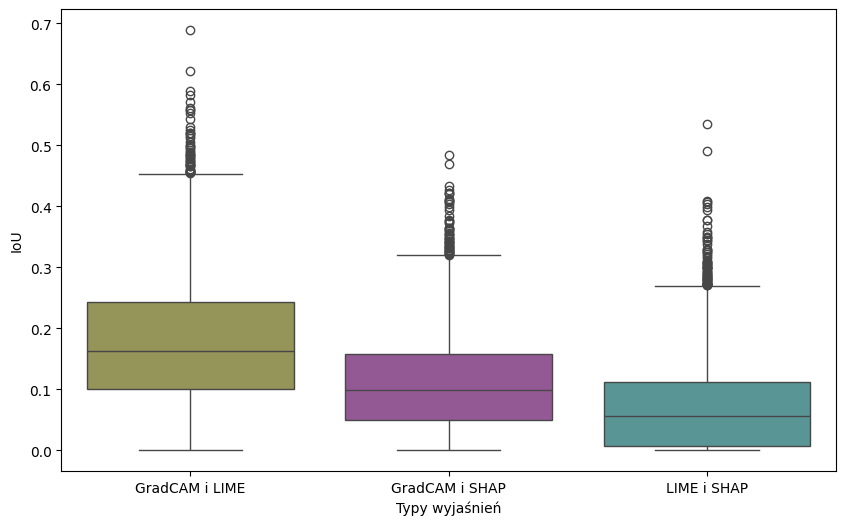

     exp_combined       iou
0  GradCAM i LIME  0.178567
1  GradCAM i SHAP  0.111023
2     LIME i SHAP  0.072478


In [290]:
loaded_df
loaded_df['exp_combined'] = loaded_df['exp_type1'] + ' i ' + loaded_df['exp_type2']


plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_combined', y='iou', data=loaded_df, palette=pal, hue='exp_combined')
plt.xlabel('Typy wyjaśnień')
plt.ylabel('IoU')
plt.show()
average_iou = loaded_df.groupby('exp_combined')['iou'].mean().reset_index()
print(average_iou)

## Kategorie

In [291]:
categories_df = pd.read_pickle("generated_data/categories.pkl")
categories_df.rename(columns={'File Name': 'img_name'}, inplace=True)
merged = pd.merge(categories_df, loaded_df, on='img_name', how='right')
categories = merged['Directory'].unique()
split_dfs = {category: merged[merged['Directory'] == category] for category in categories}

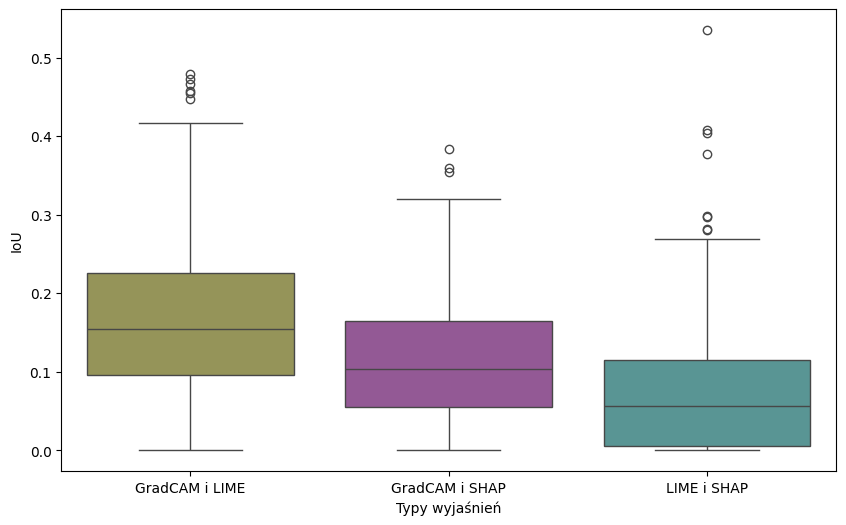

04_carnivore
     exp_combined       iou
0  GradCAM i LIME  0.167741
1  GradCAM i SHAP  0.114880
2     LIME i SHAP  0.072844
-------------------------


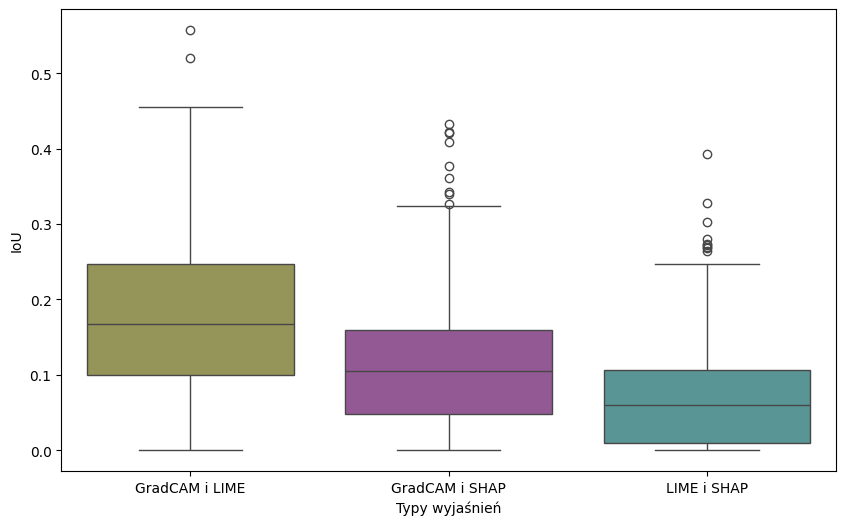

08_fish
     exp_combined       iou
0  GradCAM i LIME  0.180948
1  GradCAM i SHAP  0.113242
2     LIME i SHAP  0.070721
-------------------------


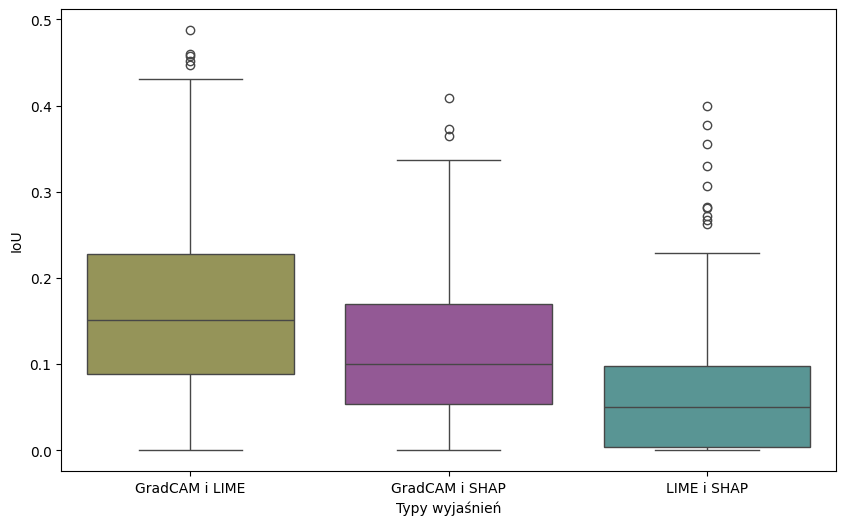

00_dog
     exp_combined       iou
0  GradCAM i LIME  0.165114
1  GradCAM i SHAP  0.113522
2     LIME i SHAP  0.064965
-------------------------


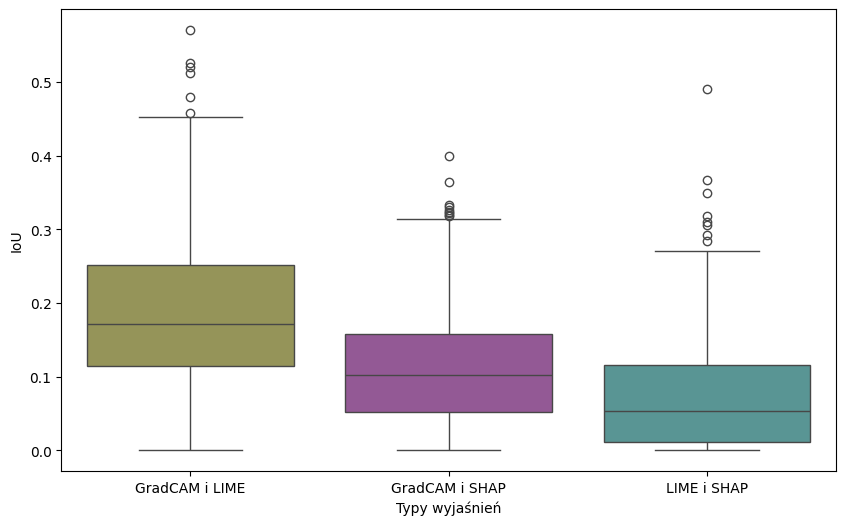

05_insect
     exp_combined       iou
0  GradCAM i LIME  0.191125
1  GradCAM i SHAP  0.112918
2     LIME i SHAP  0.075120
-------------------------


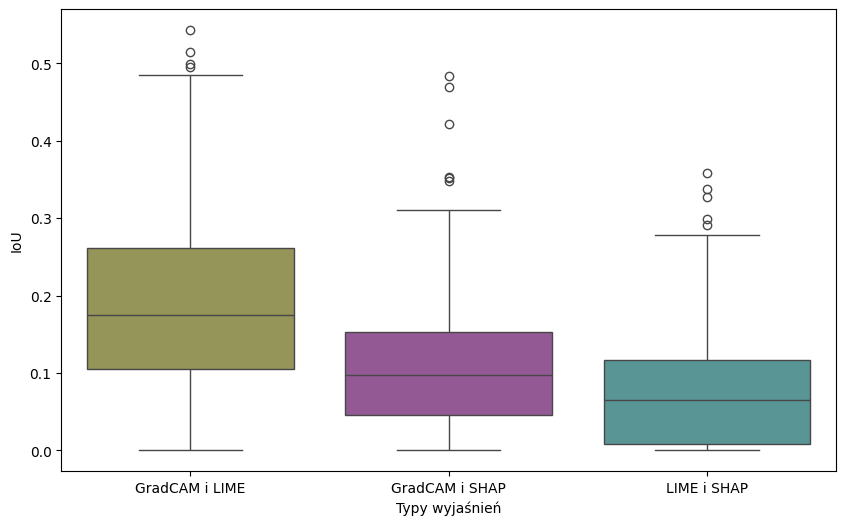

03_reptile
     exp_combined       iou
0  GradCAM i LIME  0.187232
1  GradCAM i SHAP  0.108796
2     LIME i SHAP  0.077426
-------------------------


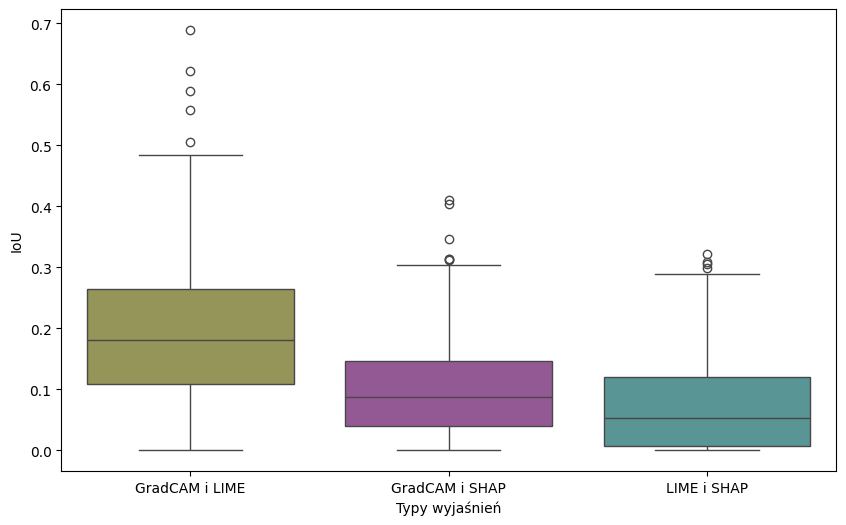

06_musical instrument
     exp_combined       iou
0  GradCAM i LIME  0.195389
1  GradCAM i SHAP  0.100318
2     LIME i SHAP  0.073182
-------------------------


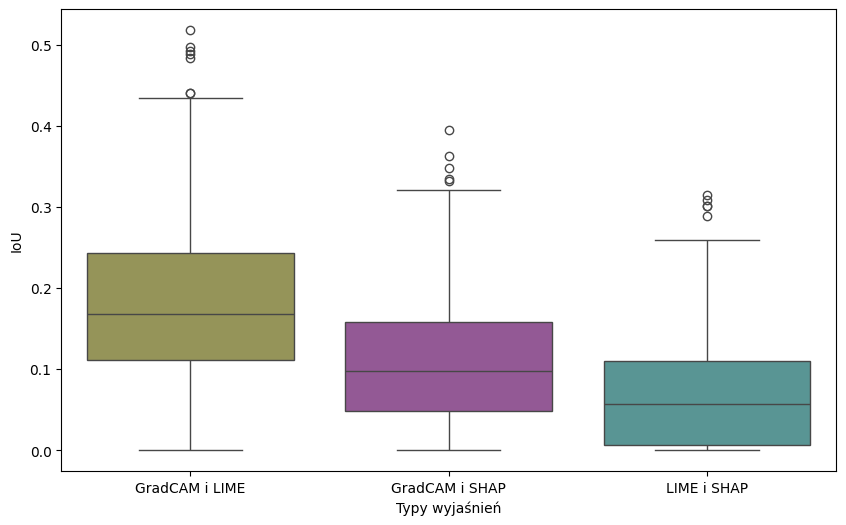

02_wheeled vehicle
     exp_combined       iou
0  GradCAM i LIME  0.184504
1  GradCAM i SHAP  0.109644
2     LIME i SHAP  0.070630
-------------------------


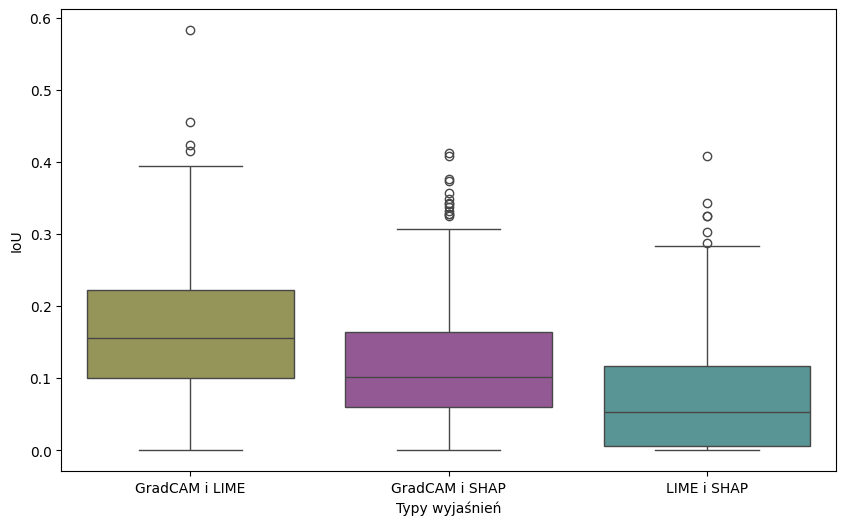

01_bird
     exp_combined       iou
0  GradCAM i LIME  0.165077
1  GradCAM i SHAP  0.117948
2     LIME i SHAP  0.075792
-------------------------


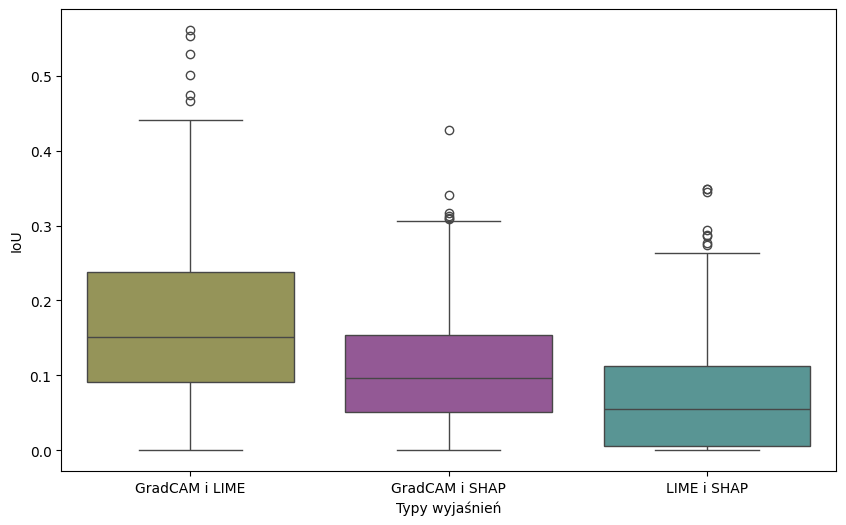

07_primate
     exp_combined       iou
0  GradCAM i LIME  0.169974
1  GradCAM i SHAP  0.107942
2     LIME i SHAP  0.071622
-------------------------


In [292]:
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='exp_combined', y='iou', data=merged[merged['Directory'] == category], palette=pal, hue='exp_combined')
    plt.xlabel('Typy wyjaśnień')
    plt.ylabel('IoU')
    plt.show()
    average_iou = merged[merged['Directory'] == category].groupby('exp_combined')['iou'].mean().reset_index()
    print(category)
    print(average_iou)
    print('-------------------------')

## Wielkość

In [293]:
sizes_df = pd.read_pickle("generated_data/sizes.pkl")
loaded_df['img_name'] = loaded_df['img_name'].str.slice(stop=-5)
sizes_df['img_name'] = sizes_df['file_name'].str.slice(stop=-4)
merged = pd.merge(sizes_df, loaded_df, on='img_name', how='right')

In [294]:
def categorize_size(size):
    if size > 0.9:
        return 'XL'
    if size > 0.5:
        return 'L'
    elif size > 0.25:
        return 'M'
    elif size >0.02:
        return 'S'
    else:
        return 'XS'

merged['size_category'] = merged['size_percent'].apply(categorize_size)
category_order = ['XS','S', 'M', 'L', 'XL']

In [295]:
merged['size_category'].value_counts()

size_category
M     4311
S     3912
L     3657
XL     141
XS     129
Name: count, dtype: int64

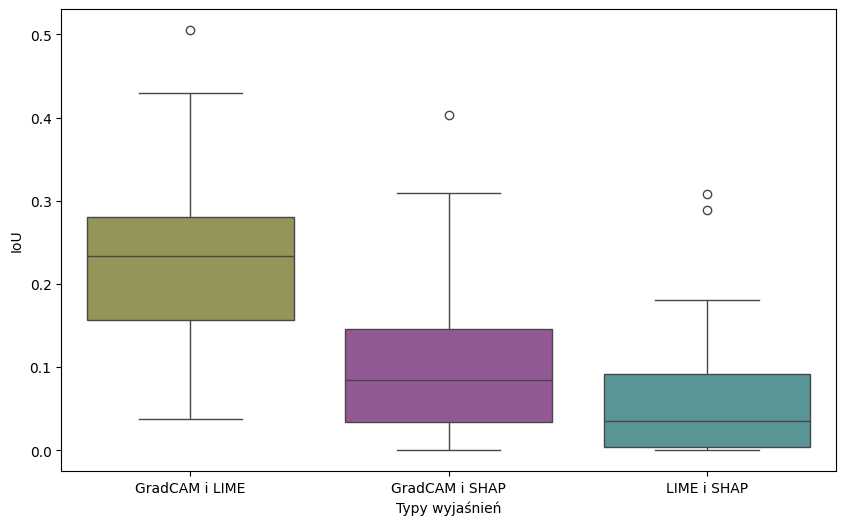

XS
     exp_combined       iou
0  GradCAM i LIME  0.230775
1  GradCAM i SHAP  0.106354
2     LIME i SHAP  0.059743
-------------------------


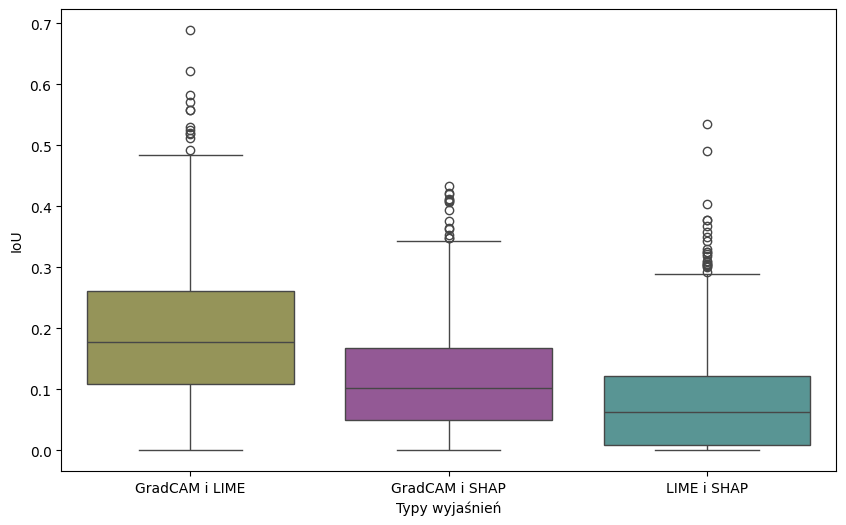

S
     exp_combined       iou
0  GradCAM i LIME  0.191562
1  GradCAM i SHAP  0.115253
2     LIME i SHAP  0.079477
-------------------------


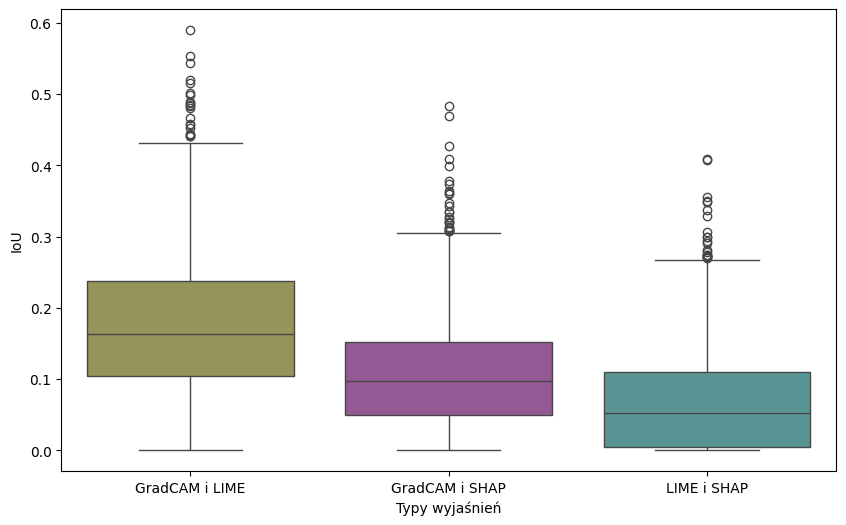

M
     exp_combined       iou
0  GradCAM i LIME  0.175971
1  GradCAM i SHAP  0.107933
2     LIME i SHAP  0.068557
-------------------------


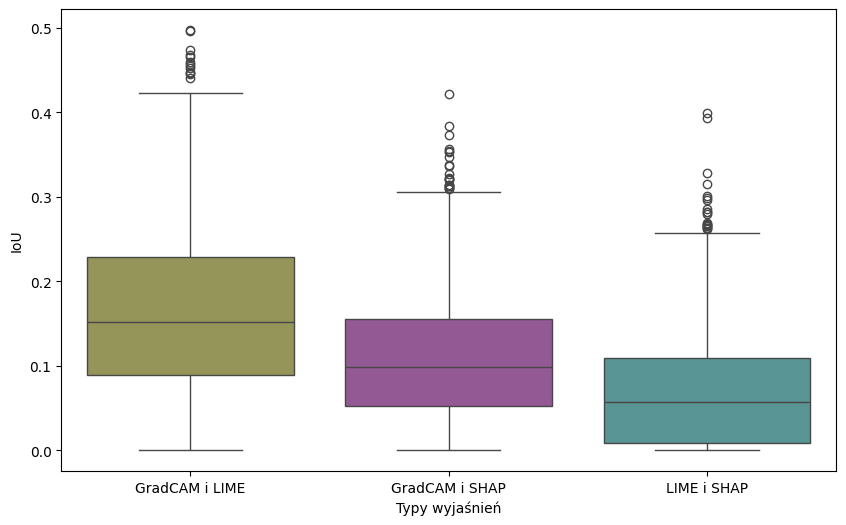

L
     exp_combined       iou
0  GradCAM i LIME  0.166485
1  GradCAM i SHAP  0.110300
2     LIME i SHAP  0.070198
-------------------------


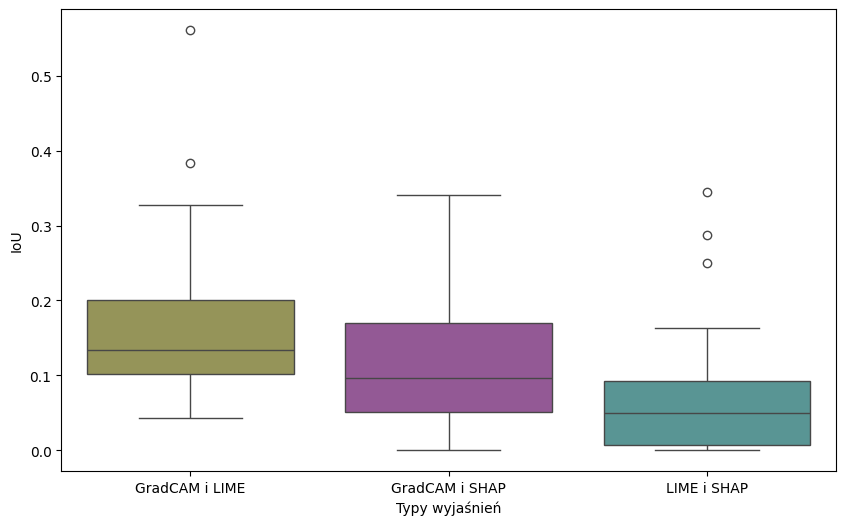

XL
     exp_combined       iou
0  GradCAM i LIME  0.163015
1  GradCAM i SHAP  0.111202
2     LIME i SHAP  0.068941
-------------------------


In [296]:
for category in category_order:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='exp_combined', y='iou', data=merged[merged['size_category'] == category], palette=pal, hue='exp_combined')
    plt.xlabel('Typy wyjaśnień')
    plt.ylabel('IoU')
    plt.show()
    average_iou = merged[merged['size_category'] == category].groupby('exp_combined')['iou'].mean().reset_index()
    print(category)
    print(average_iou)
    print('-------------------------')

# Size exp

In [297]:
size_exp_df = pd.read_pickle("generated_data/size_exp.pkl")

In [298]:
sizes_df = pd.read_pickle("generated_data/sizes.pkl")

In [299]:
size_exp_df['img'] = size_exp_df['img_name'].str.slice(stop=-5)
sizes_df['img'] = sizes_df['file_name'].str.slice(stop=-4)

In [300]:
merged = pd.merge(size_exp_df, sizes_df, on='img', how='left')

In [301]:
merged['exp_size%'] = merged['exp_size']/(224*224)*100

In [302]:
merged['size%'] = merged['size_percent']*100

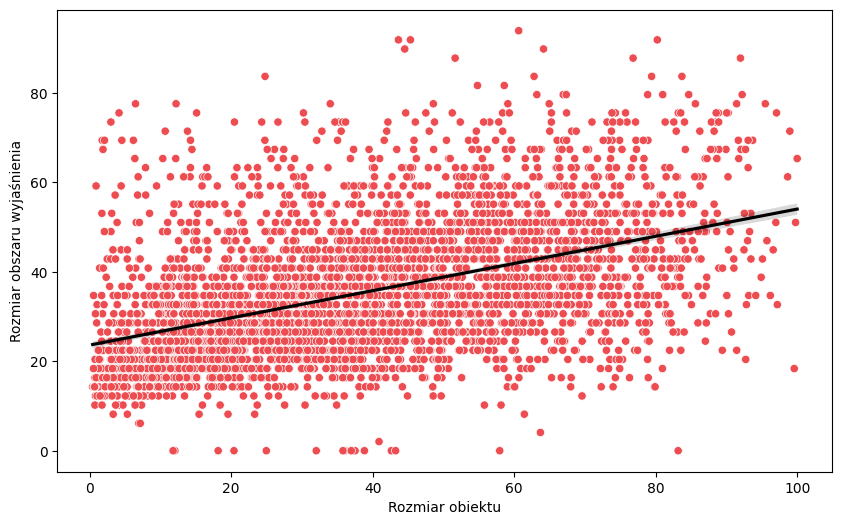

In [303]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=merged[merged['exp_type'] == "gradcam"], x="size%", y="exp_size%", palette=pal_base, hue='exp_type')
sns.regplot(data=merged[merged['exp_type'] == "gradcam"], x="size%", y="exp_size%", scatter=False, color='black')

scatter_plot.set_xlabel("Rozmiar obiektu")
scatter_plot.set_ylabel("Rozmiar obszaru wyjaśnienia")
scatter_plot.legend_.remove()

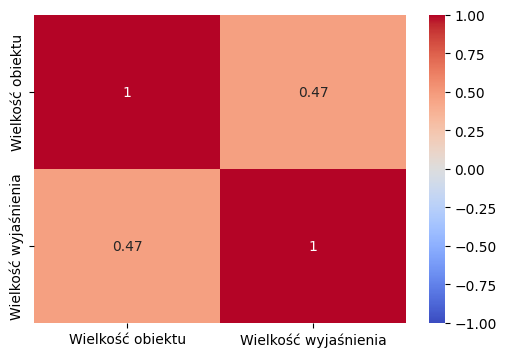

In [304]:
corr_matrix = merged[merged['exp_type'] == "gradcam"][['size_percent', 'exp_size']].corr()
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
                      xticklabels=['Wielkość obiektu', 'Wielkość wyjaśnienia'],
                      yticklabels=['Wielkość obiektu', 'Wielkość wyjaśnienia'])


# Experiment

In [305]:
loaded_df = pd.read_pickle("generated_data/experiment.pkl")

In [306]:
loaded_df['confidence_change_exp'] = loaded_df['new_pred'] - loaded_df['old_pred']
loaded_df['confidence_change_no_exp'] = loaded_df['new_pred_wo_exp'] - loaded_df['old_pred_wo_exp']

In [307]:
names_replace = {
    'gradcam': 'GradCAM',
    'shap': 'SHAP',
    'lime': 'LIME'
}
loaded_df['exp_type'] = loaded_df['exp_type'].replace(names_replace)

In [308]:
iou_df = loaded_df[["iou", "exp_type"]]
cce_df = loaded_df[["confidence_change_exp", "exp_type"]]
ccne_df = loaded_df[["confidence_change_no_exp", "exp_type"]]

## IoU

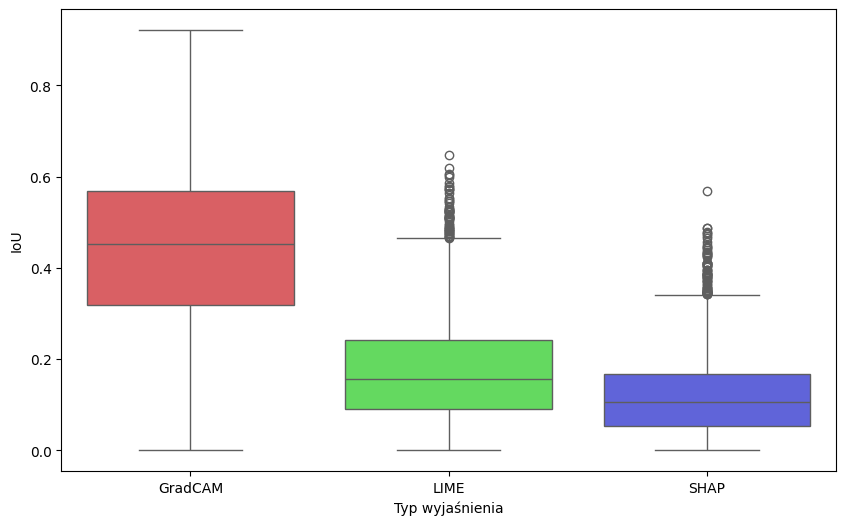

In [309]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_type', y='iou', data=loaded_df, palette=pal_base, hue='exp_type')
plt.xlabel('Typ wyjaśnienia')
plt.ylabel('IoU')
plt.show()

In [310]:
average_iou = loaded_df.groupby('exp_type')['iou'].mean().reset_index()
print(average_iou)

  exp_type       iou
0  GradCAM  0.439863
1     LIME  0.176337
2     SHAP  0.118810


## area of explanation wrong percent

In [311]:
loaded_df['incorrect%'] = loaded_df['procent_incorrect'] * 100

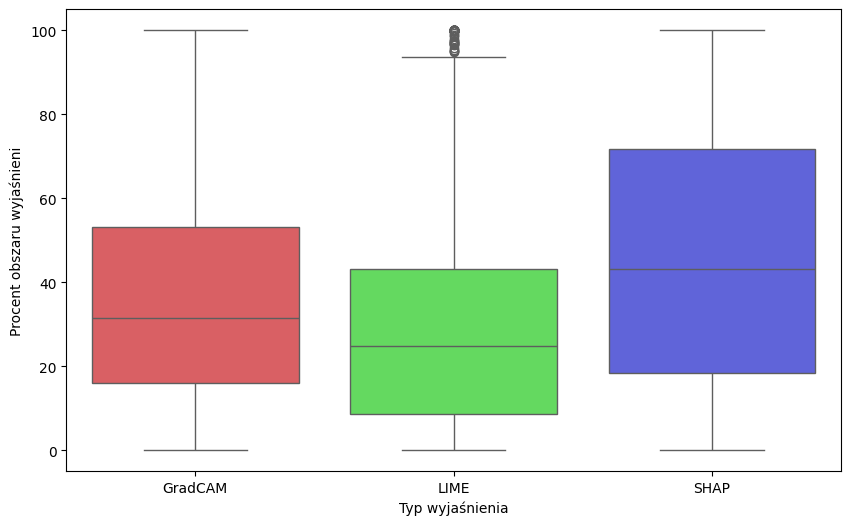

In [312]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_type', y='incorrect%', data=loaded_df, palette=pal_base, hue='exp_type')
plt.xlabel('Typ wyjaśnienia')
plt.ylabel('Procent obszaru wyjaśnieni')
plt.show()

In [313]:
average_iou = loaded_df.groupby('exp_type')['incorrect%'].mean().reset_index()
print(average_iou)

  exp_type  incorrect%
0  GradCAM   36.310489
1     LIME   28.544654
2     SHAP   45.590079


## exp

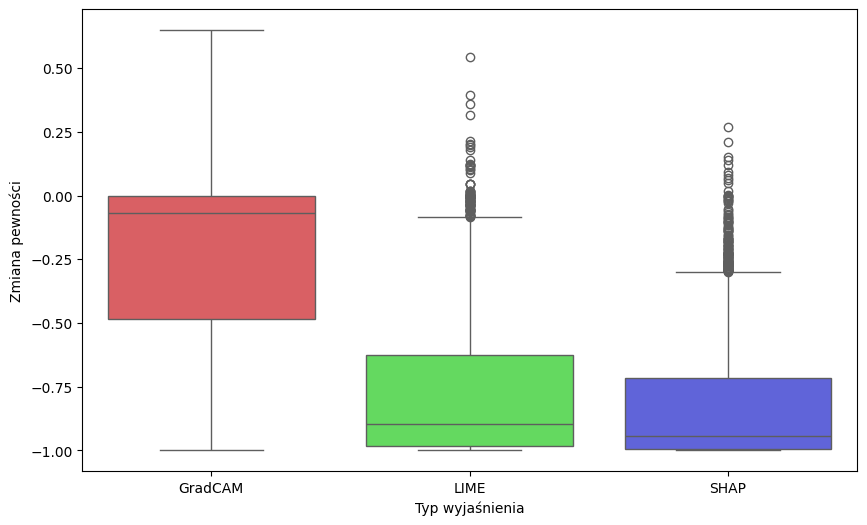

In [314]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_type', y="confidence_change_exp", data=loaded_df, palette=pal_base, hue='exp_type')
plt.xlabel('Typ wyjaśnienia')
plt.ylabel('Zmiana pewności')
plt.show()


In [315]:
loaded_df['__confidence_change_exp_drop'] = loaded_df['confidence_change_exp'].apply(lambda x: 0 if x > 0 else x)

In [316]:
average_iou = loaded_df.groupby('exp_type')['__confidence_change_exp_drop'].mean().reset_index()
print(average_iou)

  exp_type  __confidence_change_exp_drop
0  GradCAM                     -0.247974
1     LIME                     -0.781209
2     SHAP                     -0.826915


In [317]:
loaded_df['__confidence_change_exp_rise'] = loaded_df['confidence_change_exp'].apply(lambda x: 1 if x > 0 else 0)

In [318]:
average_iou = loaded_df.groupby('exp_type')['__confidence_change_exp_rise'].mean().reset_index()
print(average_iou)

  exp_type  __confidence_change_exp_rise
0  GradCAM                      0.248148
1     LIME                      0.008642
2     SHAP                      0.002963


## no exp

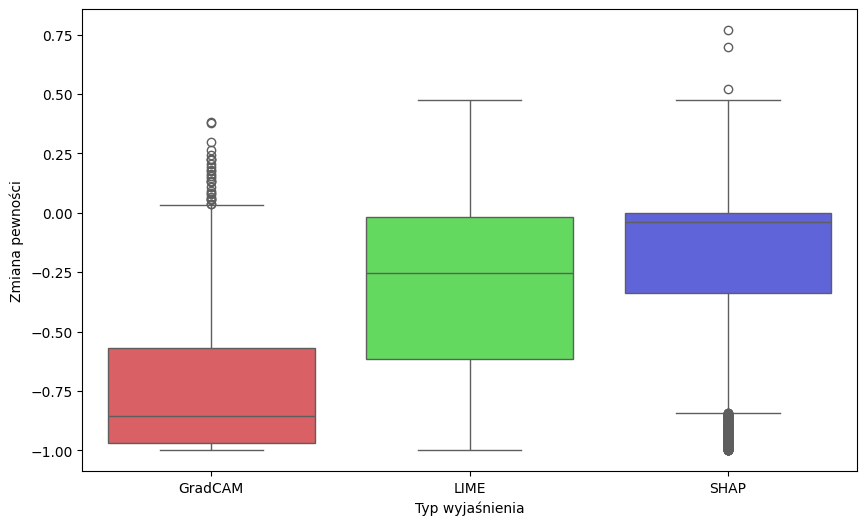

In [319]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_type', y="confidence_change_no_exp", data=loaded_df, palette=pal_base, hue='exp_type')
plt.xlabel('Typ wyjaśnienia')
plt.ylabel('Zmiana pewności')
plt.show()


In [320]:
loaded_df['__confidence_change_no_exp_drop'] = loaded_df['confidence_change_no_exp'].apply(lambda x: 0 if x > 0 else x)
average_iou = loaded_df.groupby('exp_type')['__confidence_change_no_exp_drop'].mean().reset_index()
print(average_iou)

  exp_type  __confidence_change_no_exp_drop
0  GradCAM                        -0.747604
1     LIME                        -0.342071
2     SHAP                        -0.204317


# By categories

In [321]:
categories_df = pd.read_pickle("generated_data/categories.pkl")

In [322]:
categories_df.rename(columns={'File Name': 'img_name'}, inplace=True)

In [323]:
merged = pd.merge(categories_df, loaded_df, on='img_name', how='right')

In [324]:
categories = merged['Directory'].unique()

In [325]:
split_dfs = {category: merged[merged['Directory'] == category] for category in categories}

## IoU

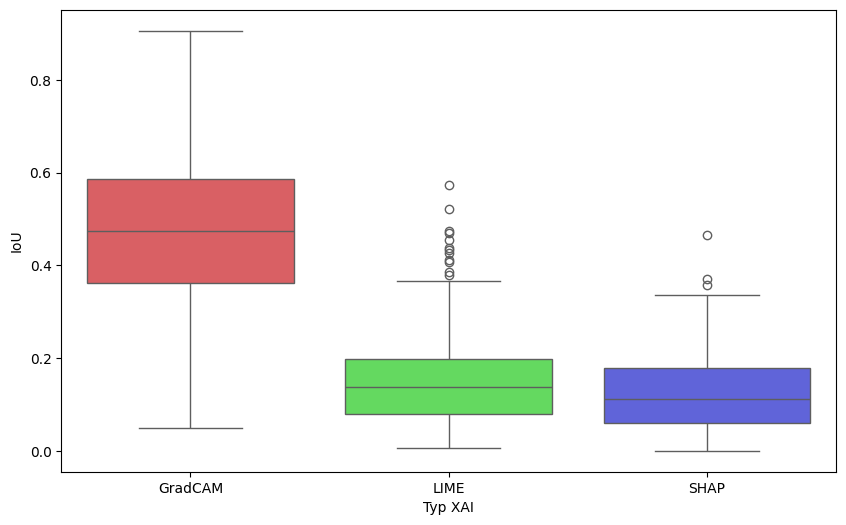

04_carnivore


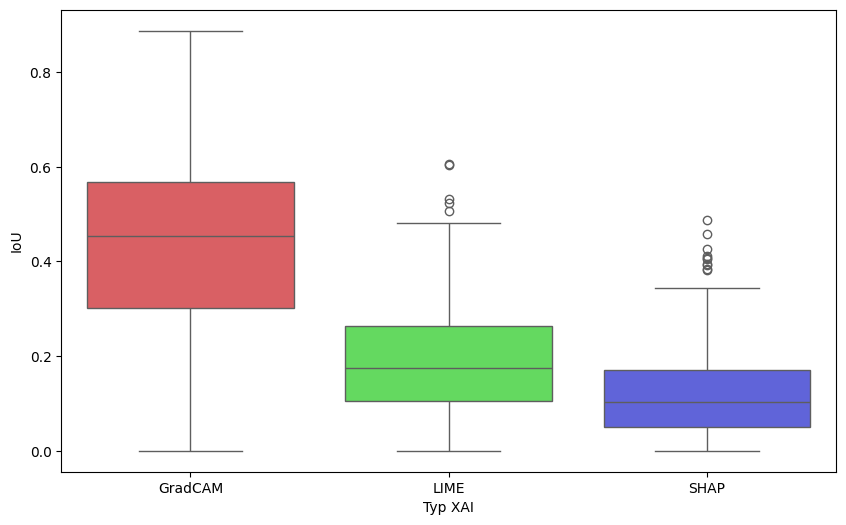

08_fish


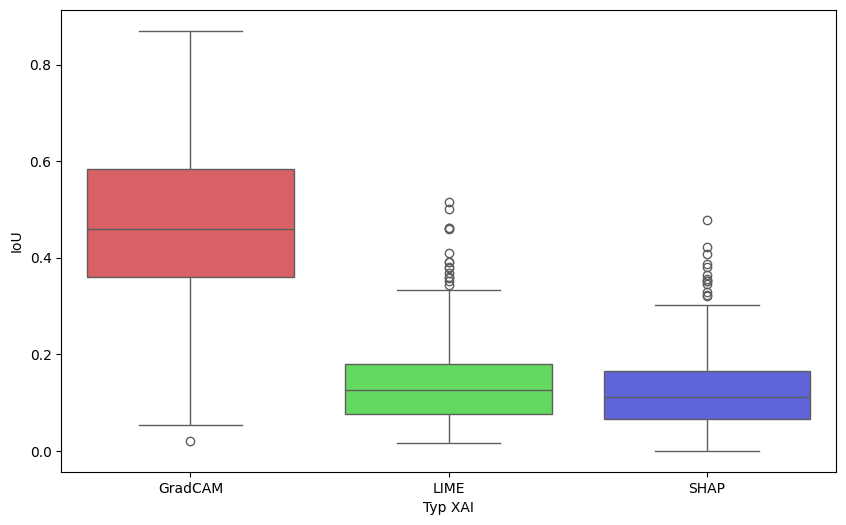

00_dog


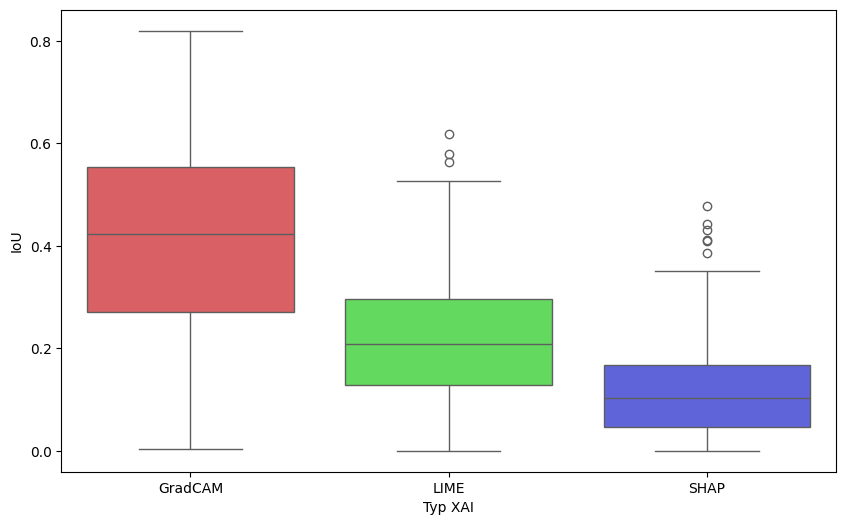

05_insect


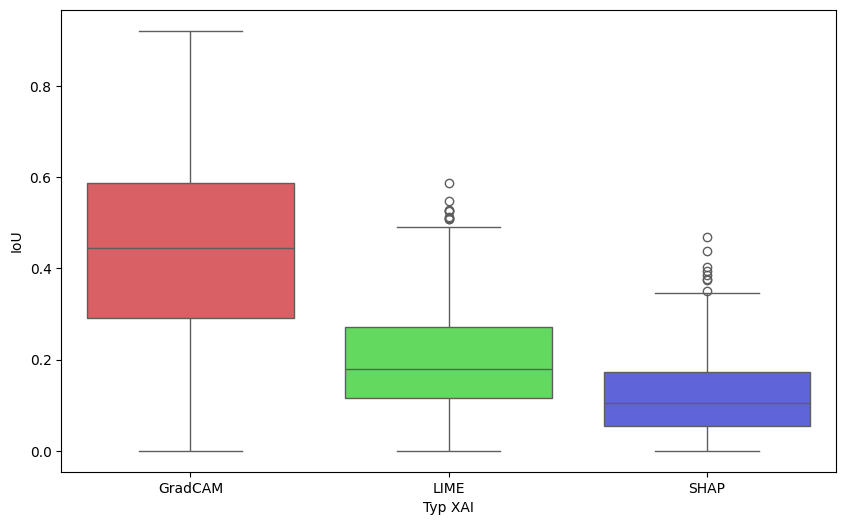

03_reptile


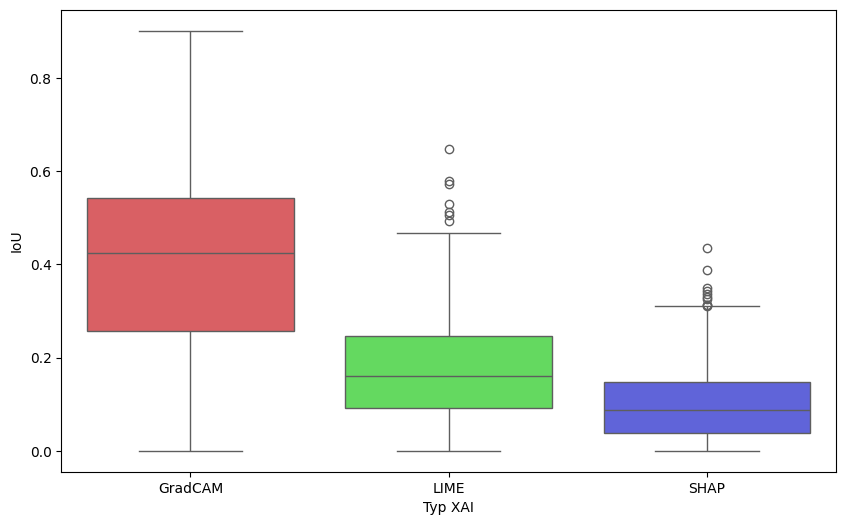

06_musical instrument


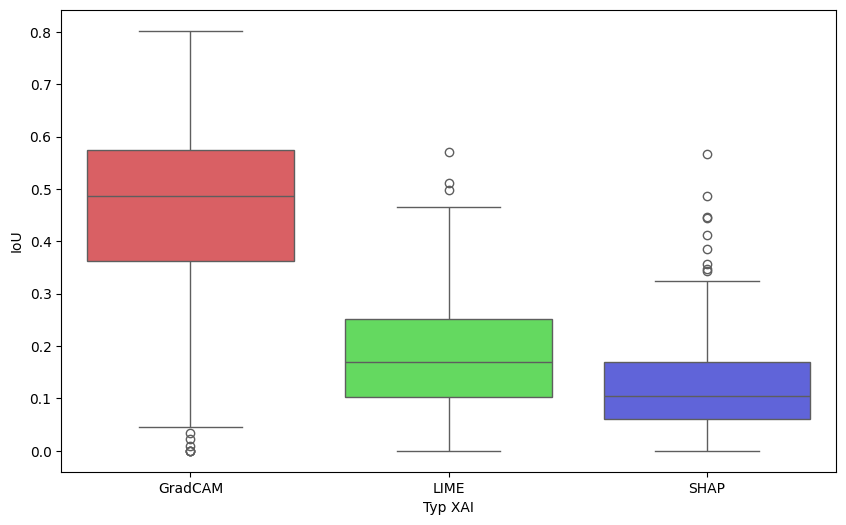

02_wheeled vehicle


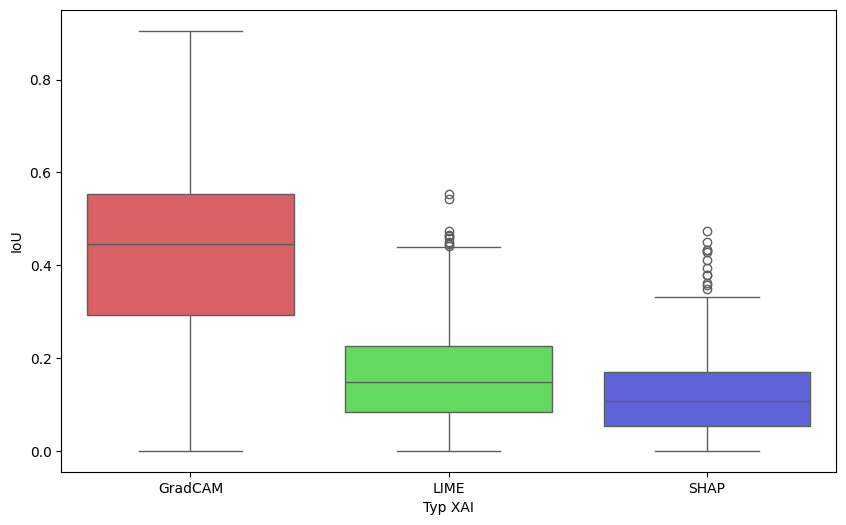

01_bird


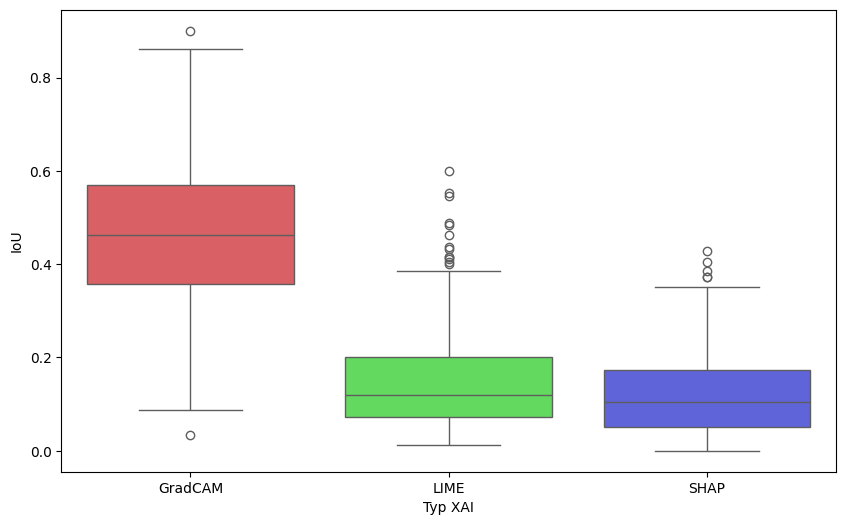

07_primate


In [326]:
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='exp_type', y='iou', data=merged[merged['Directory'] == category], palette=pal_base, hue='exp_type')
    plt.xlabel('Typ XAI')
    plt.ylabel('IoU')
    plt.show()
    print(category)

In [327]:
for category in categories:
    temp_df = merged[merged['Directory'] == category].copy()
    average_iou = temp_df.groupby('exp_type')['iou'].mean().reset_index()
    print(category)
    print(average_iou)

04_carnivore
  exp_type       iou
0  GradCAM  0.468916
1     LIME  0.154079
2     SHAP  0.122430
08_fish
  exp_type       iou
0  GradCAM  0.427992
1     LIME  0.189446
2     SHAP  0.119783
00_dog
  exp_type       iou
0  GradCAM  0.467134
1     LIME  0.140748
2     SHAP  0.123451
05_insect
  exp_type       iou
0  GradCAM  0.410650
1     LIME  0.218640
2     SHAP  0.115746
03_reptile
  exp_type       iou
0  GradCAM  0.436193
1     LIME  0.201811
2     SHAP  0.121951
06_musical instrument
  exp_type       iou
0  GradCAM  0.394289
1     LIME  0.179295
2     SHAP  0.102792
02_wheeled vehicle
  exp_type       iou
0  GradCAM  0.459880
1     LIME  0.185348
2     SHAP  0.121152
01_bird
  exp_type       iou
0  GradCAM  0.428416
1     LIME  0.166958
2     SHAP  0.123881
07_primate
  exp_type       iou
0  GradCAM  0.465292
1     LIME  0.150706
2     SHAP  0.118099


## area of explanation wrong percent

In [328]:
merged['incorrect%'] = merged['procent_incorrect'] * 100

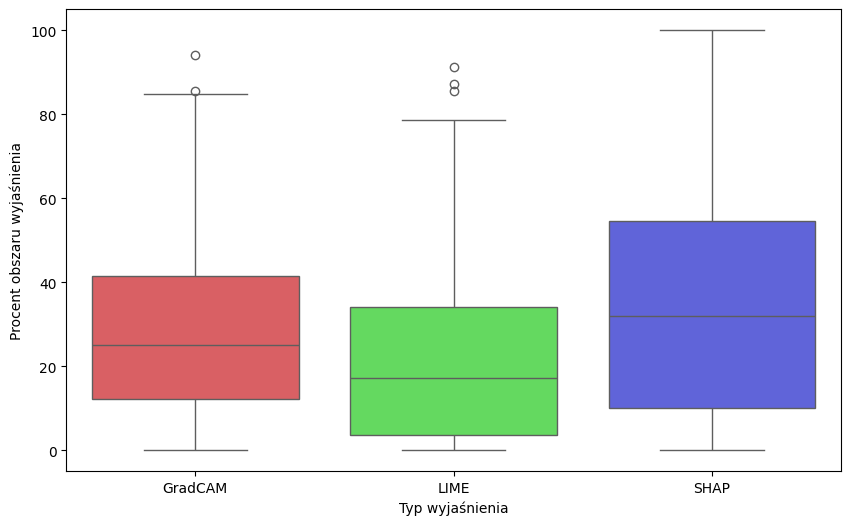

04_carnivore


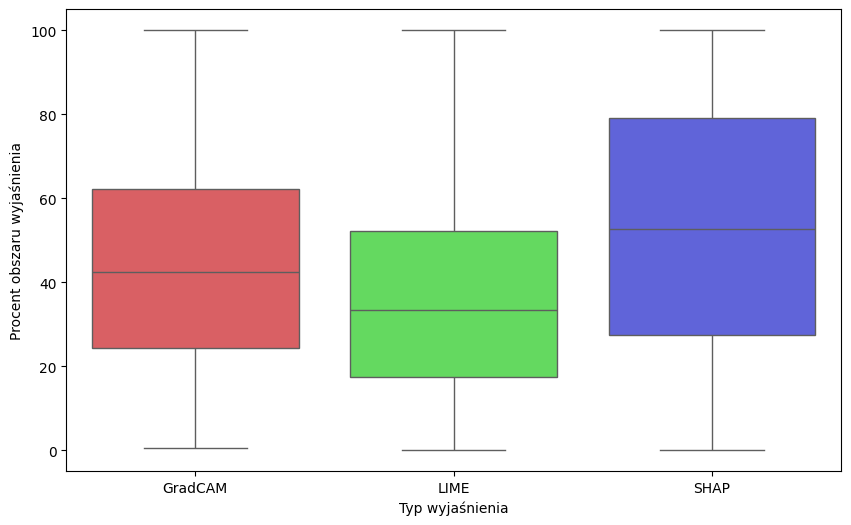

08_fish


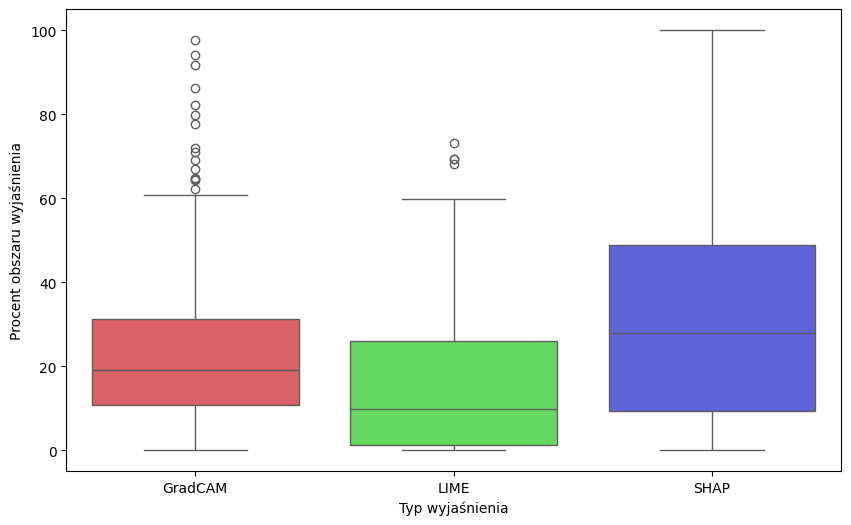

00_dog


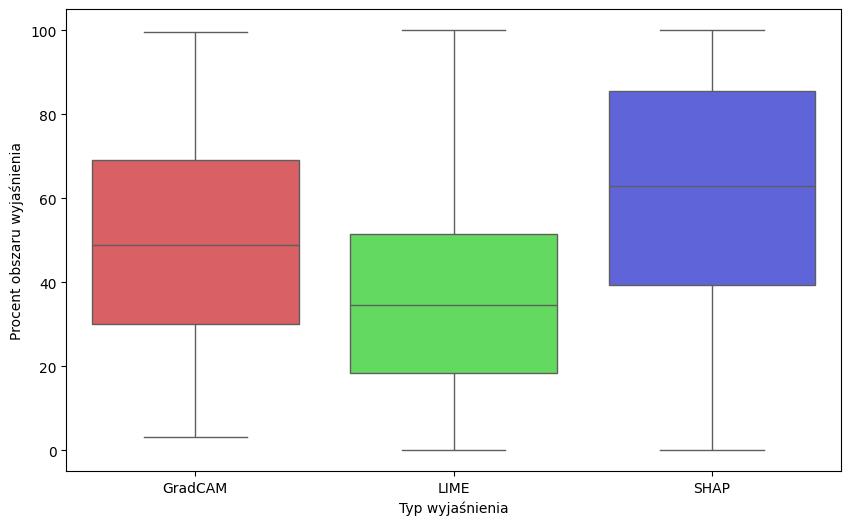

05_insect


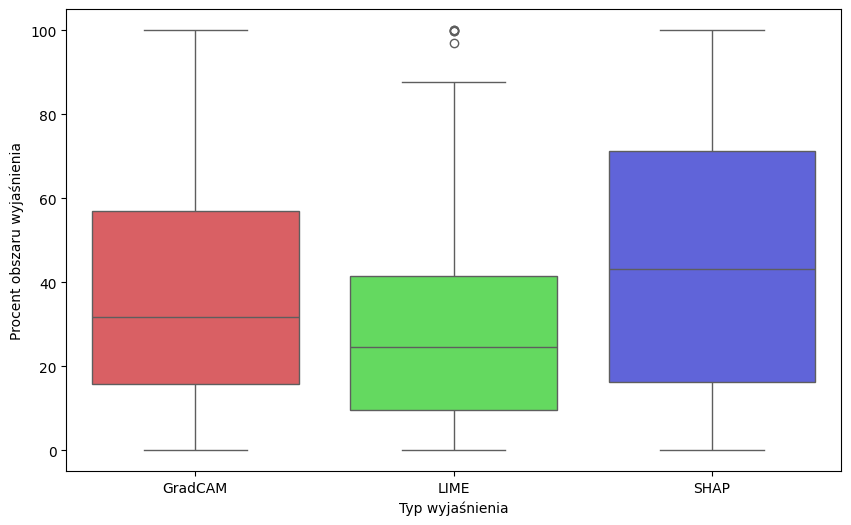

03_reptile


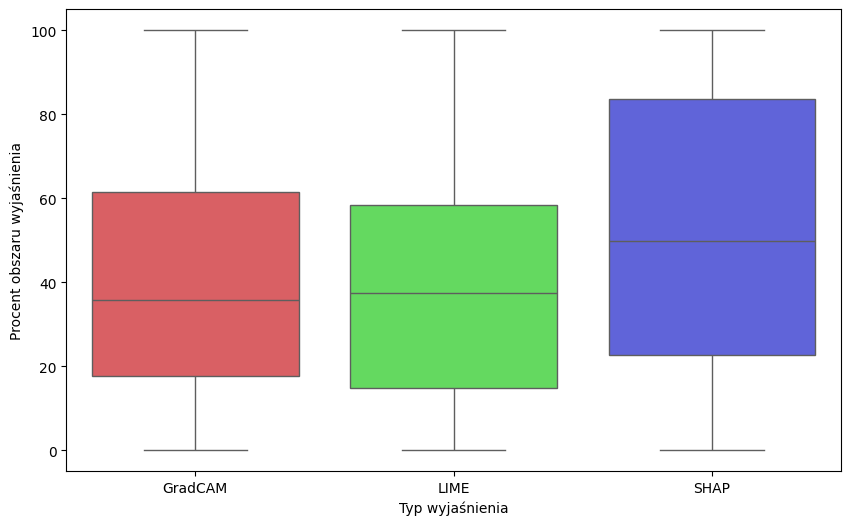

06_musical instrument


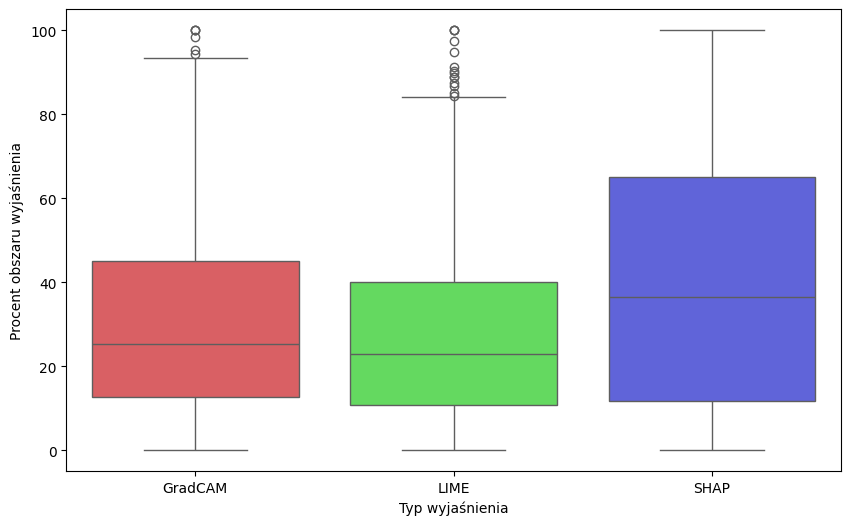

02_wheeled vehicle


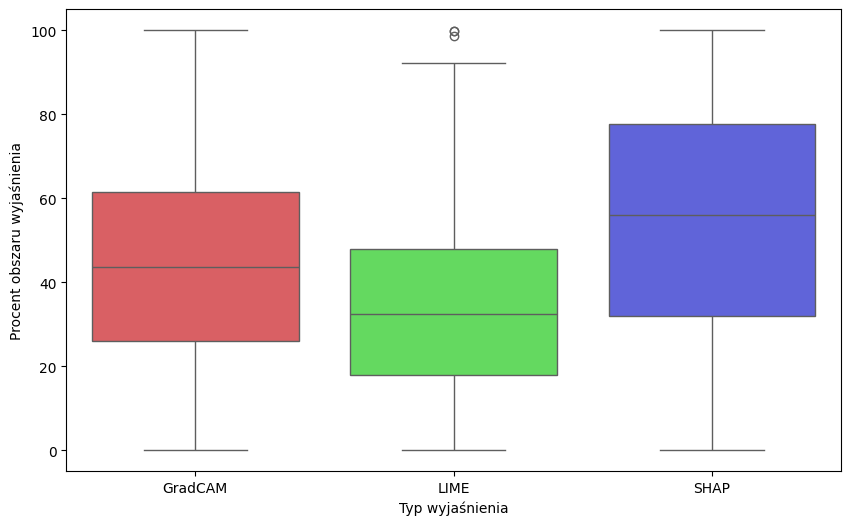

01_bird


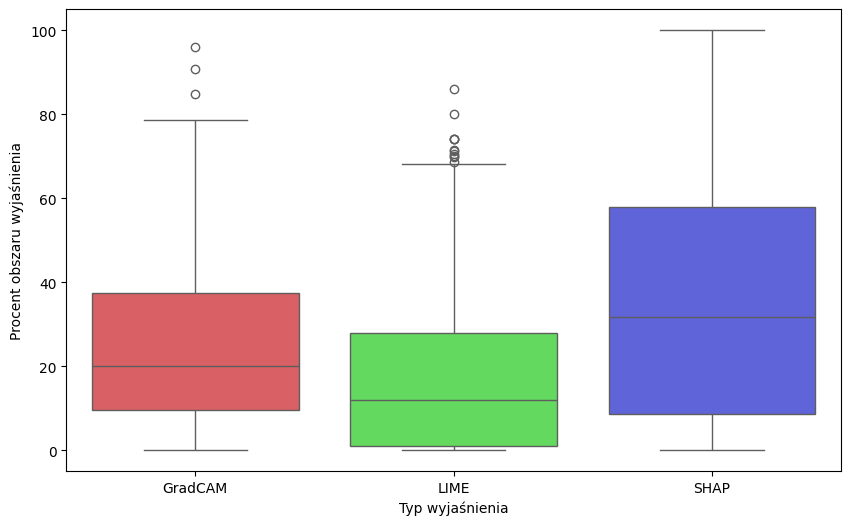

07_primate


In [329]:
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='exp_type', y='incorrect%', data=merged[merged['Directory'] == category], palette=pal_base, hue='exp_type')
    plt.xlabel('Typ wyjaśnienia')
    plt.ylabel('Procent obszaru wyjaśnienia')
    plt.show()
    print(category)

In [330]:
for category in categories:
    temp_df = merged[merged['Directory'] == category].copy()
    average_iou = temp_df.groupby('exp_type')['incorrect%'].mean().reset_index()
    print(category)
    print(average_iou)

04_carnivore
  exp_type  incorrect%
0  GradCAM   28.788019
1     LIME   20.999559
2     SHAP   34.912974
08_fish
  exp_type  incorrect%
0  GradCAM   45.224726
1     LIME   36.728101
2     SHAP   53.590312
00_dog
  exp_type  incorrect%
0  GradCAM   22.727765
1     LIME   15.608602
2     SHAP   32.742012
05_insect
  exp_type  incorrect%
0  GradCAM   50.101927
1     LIME   36.614944
2     SHAP   61.524663
03_reptile
  exp_type  incorrect%
0  GradCAM   37.630000
1     LIME   27.926620
2     SHAP   45.545502
06_musical instrument
  exp_type  incorrect%
0  GradCAM   41.103004
1     LIME   39.156369
2     SHAP   52.134963
02_wheeled vehicle
  exp_type  incorrect%
0  GradCAM   31.756452
1     LIME   28.022858
2     SHAP   39.598063
01_bird
  exp_type  incorrect%
0  GradCAM   44.389150
1     LIME   34.211208
2     SHAP   53.824976
07_primate
  exp_type  incorrect%
0  GradCAM    25.07336
1     LIME    17.63363
2     SHAP    36.43725


## exp

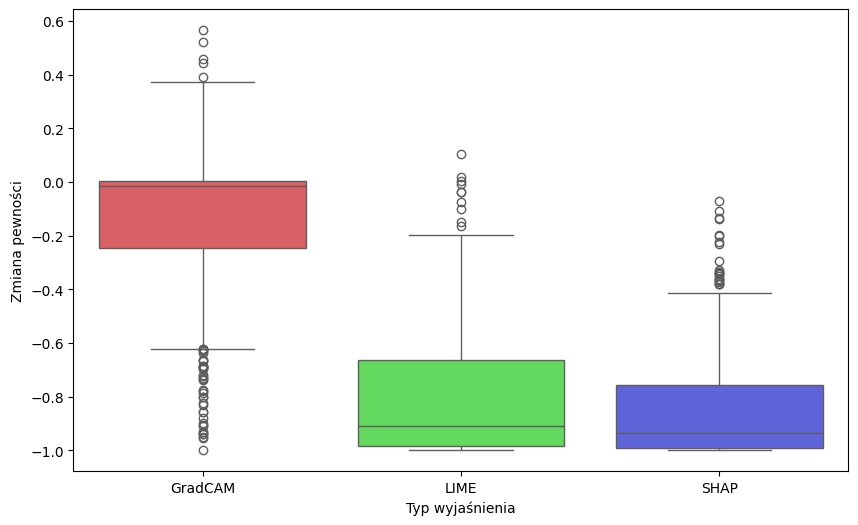

04_carnivore


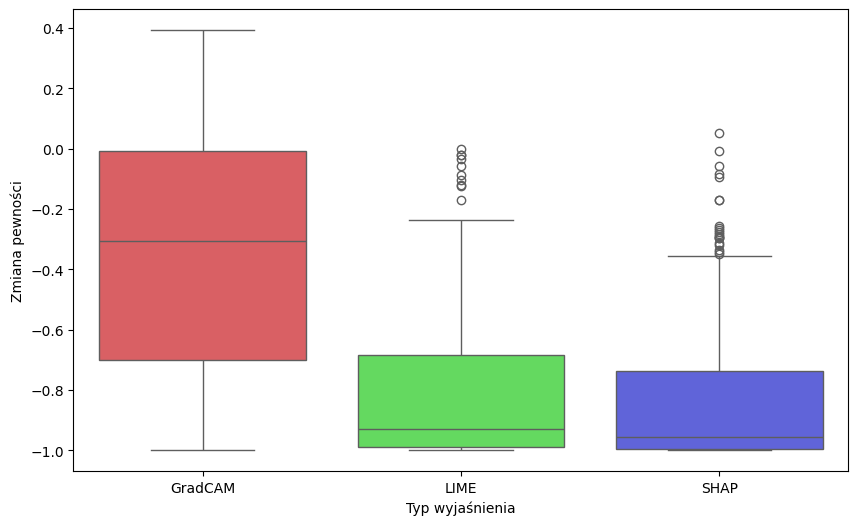

08_fish


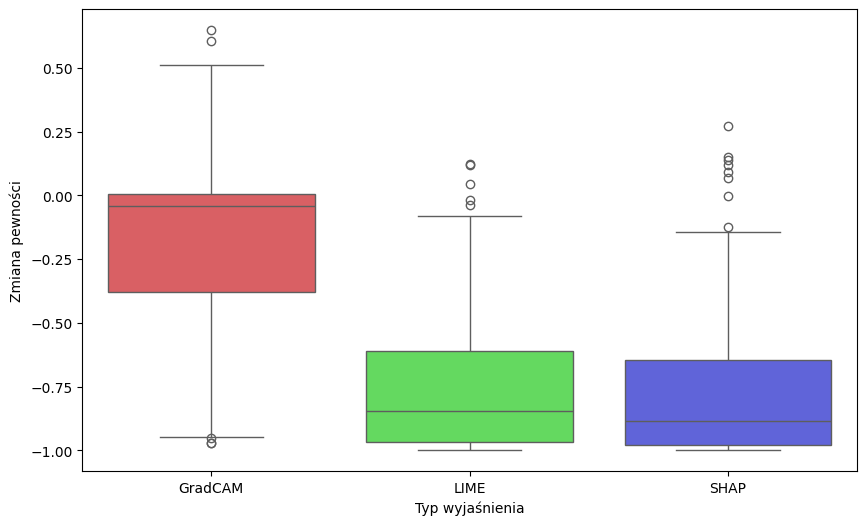

00_dog


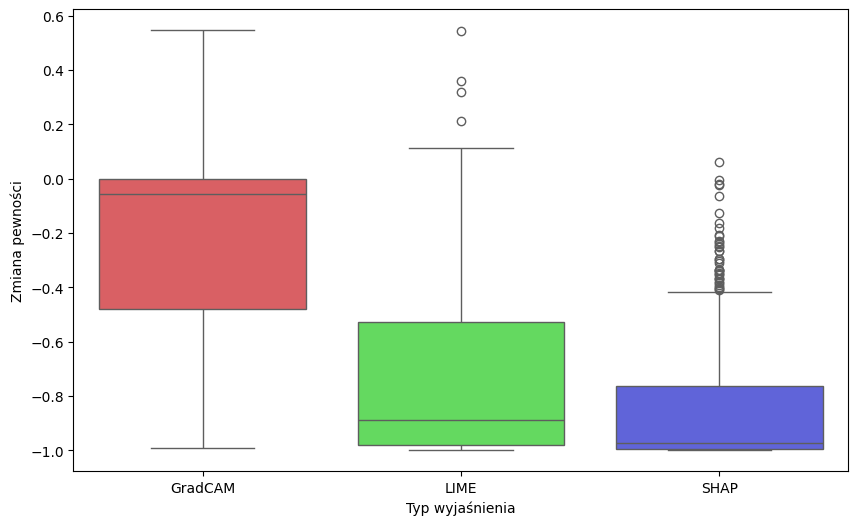

05_insect


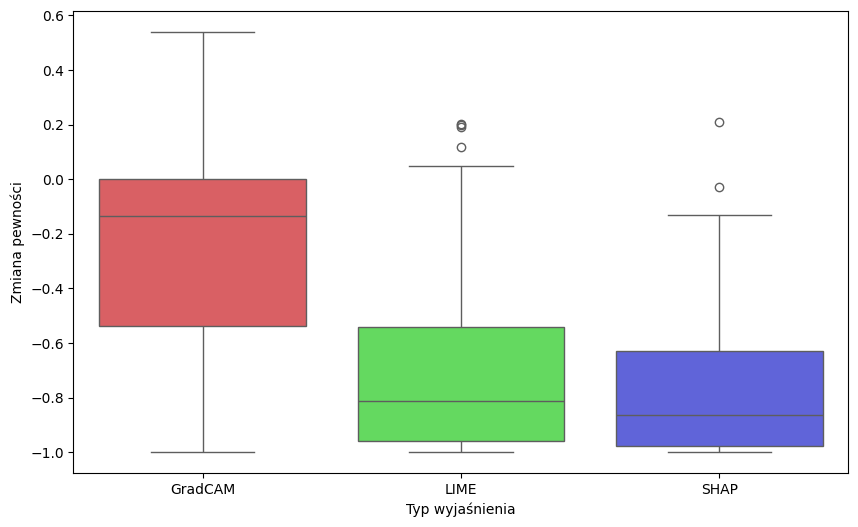

03_reptile


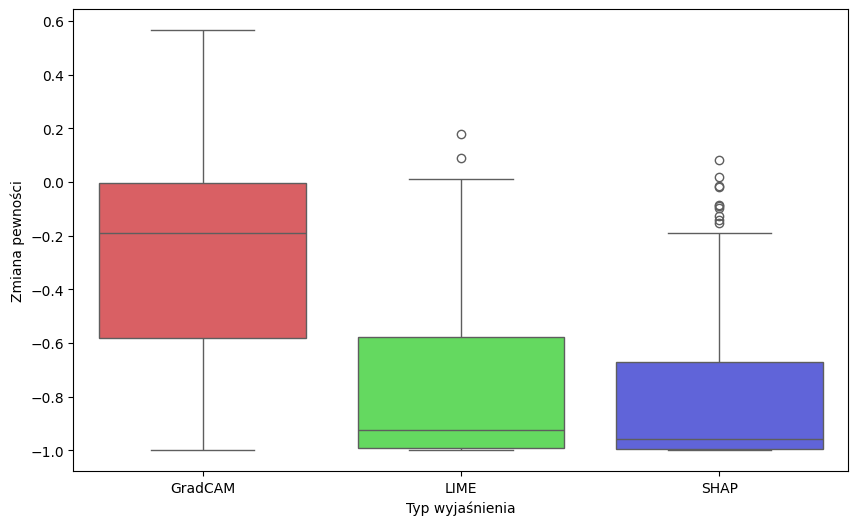

06_musical instrument


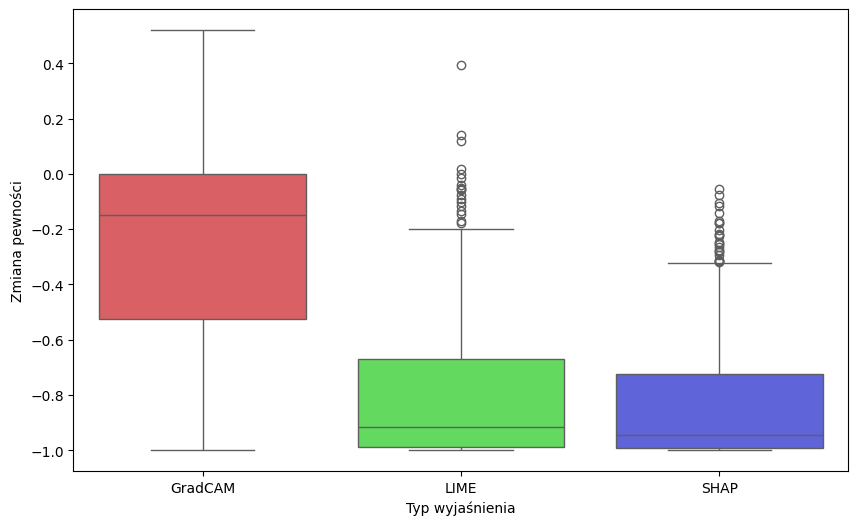

02_wheeled vehicle


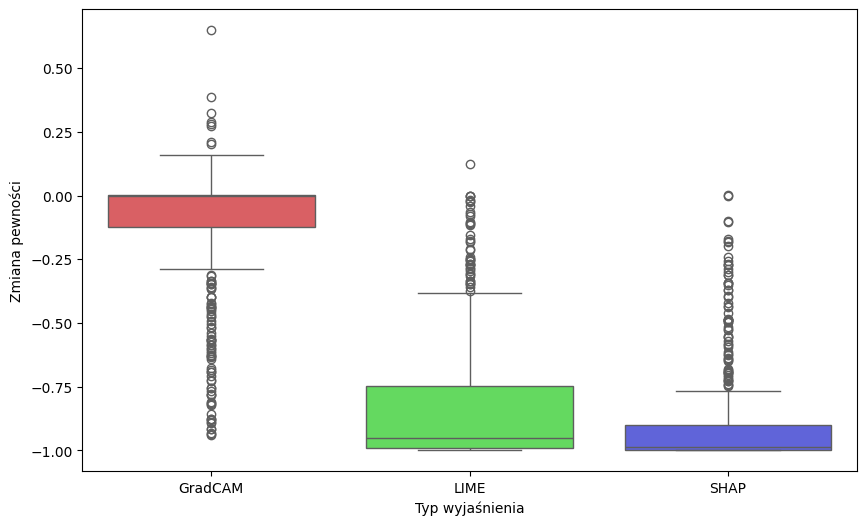

01_bird


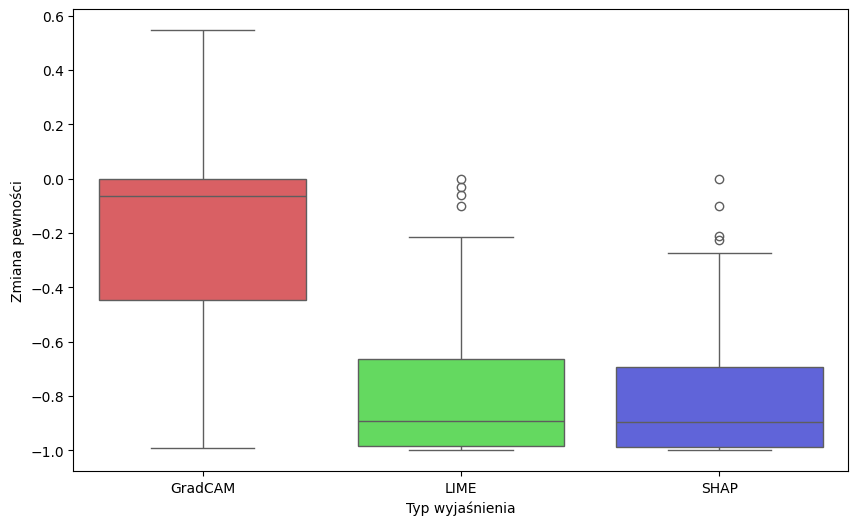

07_primate


In [331]:
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='exp_type', y="confidence_change_exp", data=merged[merged['Directory'] == category], palette=pal_base, hue='exp_type')
    plt.xlabel('Typ wyjaśnienia')
    plt.ylabel('Zmiana pewności')
    plt.show()
    print(category)

In [332]:
for category in categories:
    temp_df = merged[merged['Directory'] == category].copy()
    temp_df['__confidence_change_exp_drop'] = temp_df['confidence_change_exp'].apply(lambda x: 0 if x > 0 else x)
    average_iou = temp_df.groupby('exp_type')['__confidence_change_exp_drop'].mean().reset_index()
    print(category)
    print(average_iou)

04_carnivore
  exp_type  __confidence_change_exp_drop
0  GradCAM                     -0.165199
1     LIME                     -0.798678
2     SHAP                     -0.837208
08_fish
  exp_type  __confidence_change_exp_drop
0  GradCAM                     -0.374784
1     LIME                     -0.812877
2     SHAP                     -0.839997
00_dog
  exp_type  __confidence_change_exp_drop
0  GradCAM                     -0.203837
1     LIME                     -0.770962
2     SHAP                     -0.794431
05_insect
  exp_type  __confidence_change_exp_drop
0  GradCAM                     -0.244699
1     LIME                     -0.734359
2     SHAP                     -0.844176
03_reptile
  exp_type  __confidence_change_exp_drop
0  GradCAM                     -0.281027
1     LIME                     -0.732984
2     SHAP                     -0.783735
06_musical instrument
  exp_type  __confidence_change_exp_drop
0  GradCAM                     -0.315661
1     LIME                 

In [333]:
for category in categories:
    temp_df = merged[merged['Directory'] == category].copy()
    temp_df['__confidence_change_exp_rise'] = temp_df['confidence_change_exp'].apply(lambda x: 1 if x > 0 else 0)
    average_iou = temp_df.groupby('exp_type')['__confidence_change_exp_rise'].mean().reset_index()
    print(category)
    print(average_iou)

04_carnivore
  exp_type  __confidence_change_exp_rise
0  GradCAM                      0.315556
1     LIME                      0.006667
2     SHAP                      0.000000
08_fish
  exp_type  __confidence_change_exp_rise
0  GradCAM                      0.126667
1     LIME                      0.000000
2     SHAP                      0.002222
00_dog
  exp_type  __confidence_change_exp_rise
0  GradCAM                      0.328889
1     LIME                      0.006667
2     SHAP                      0.013333
05_insect
  exp_type  __confidence_change_exp_rise
0  GradCAM                      0.231111
1     LIME                      0.024444
2     SHAP                      0.002222
03_reptile
  exp_type  __confidence_change_exp_rise
0  GradCAM                      0.255556
1     LIME                      0.022222
2     SHAP                      0.002222
06_musical instrument
  exp_type  __confidence_change_exp_rise
0  GradCAM                      0.148889
1     LIME                 

## no exp

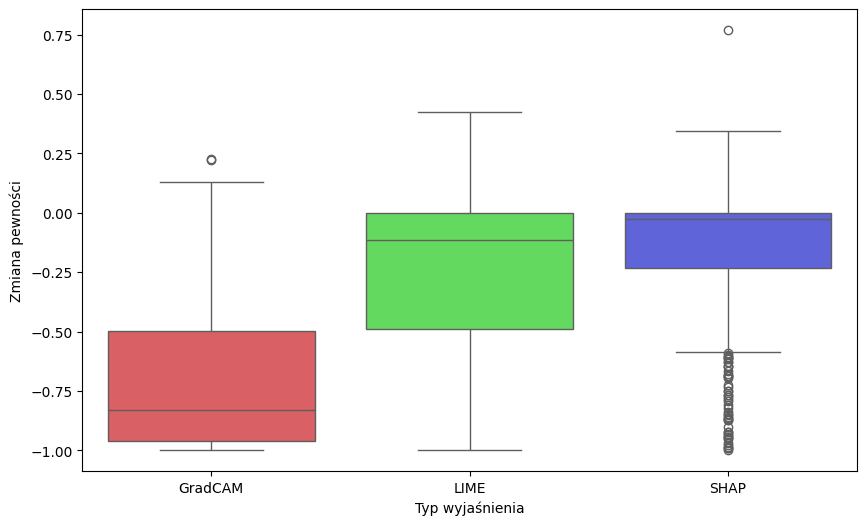

04_carnivore


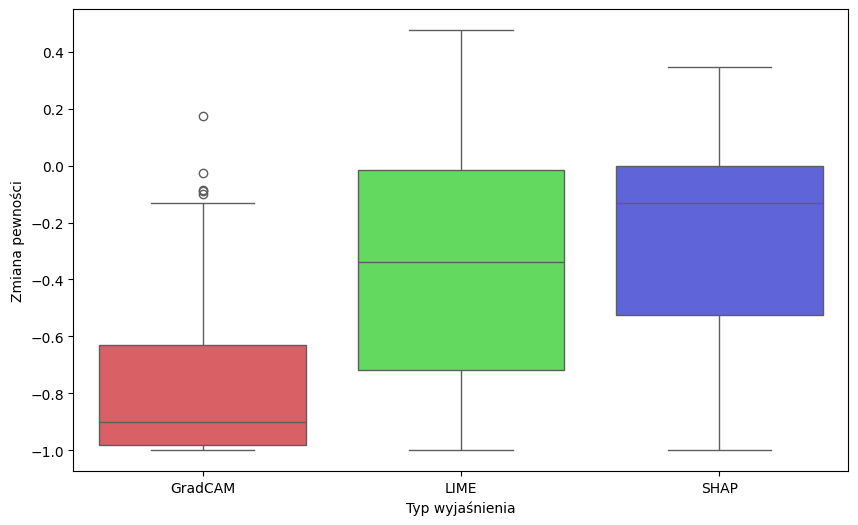

08_fish


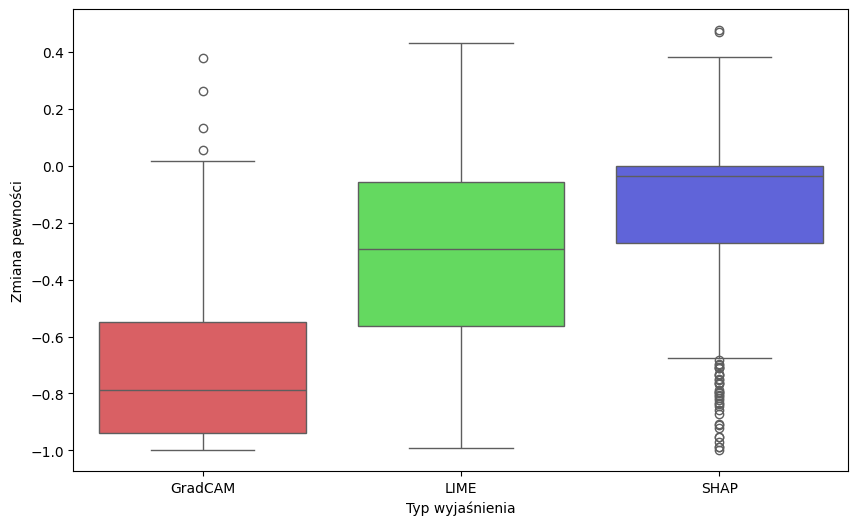

00_dog


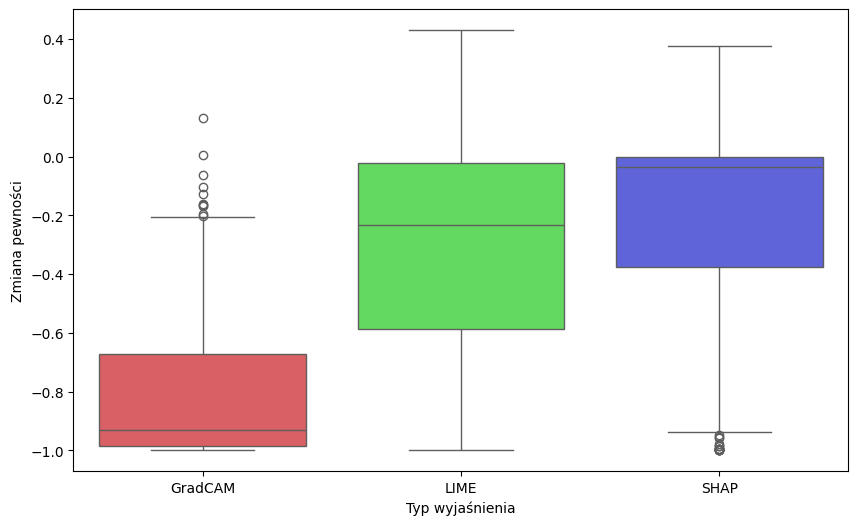

05_insect


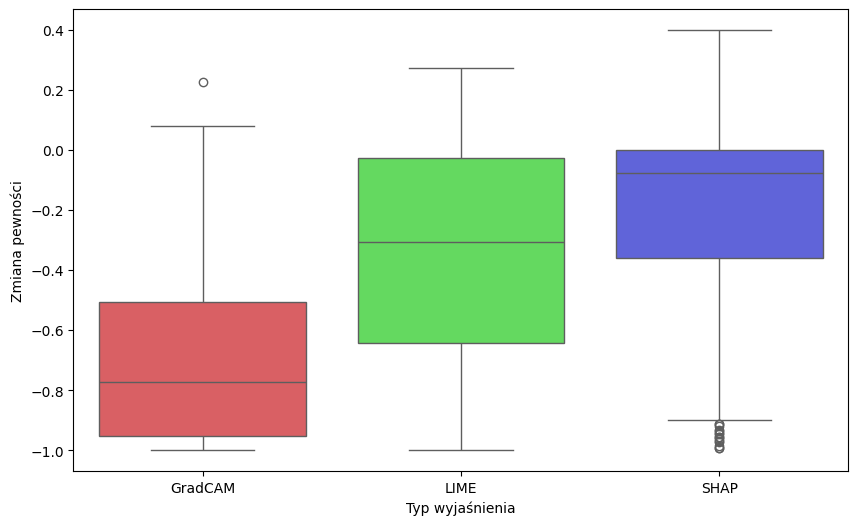

03_reptile


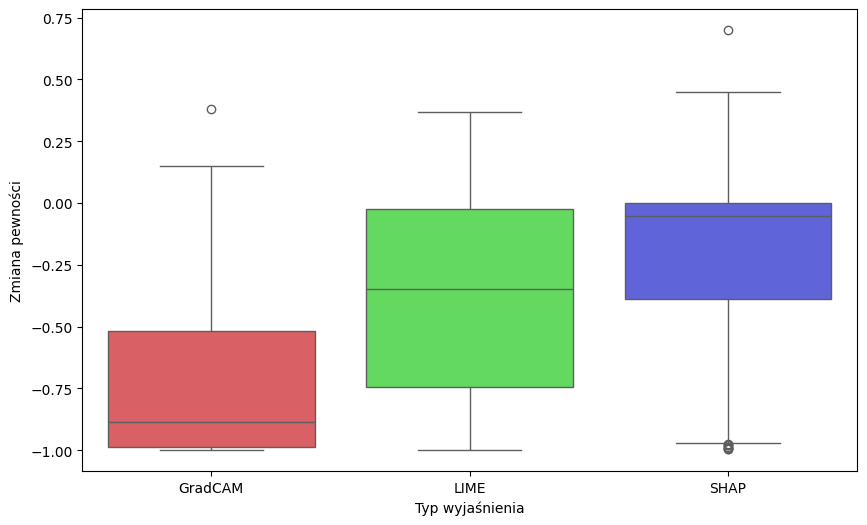

06_musical instrument


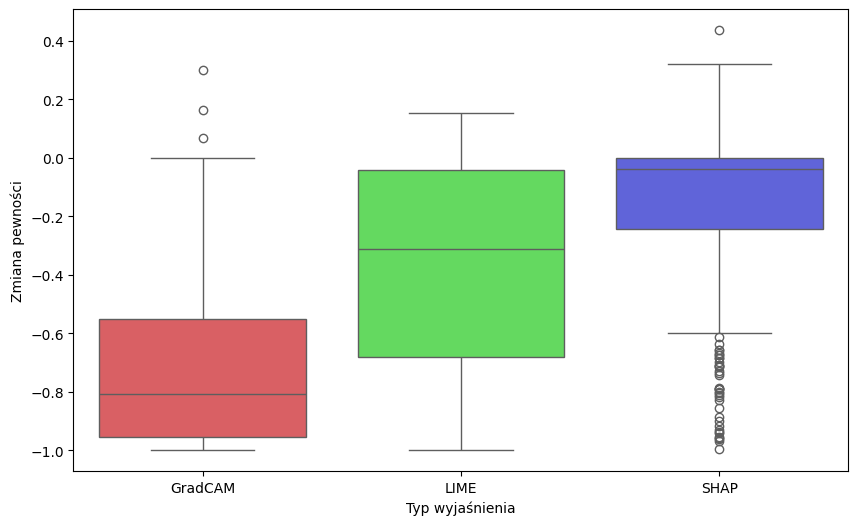

02_wheeled vehicle


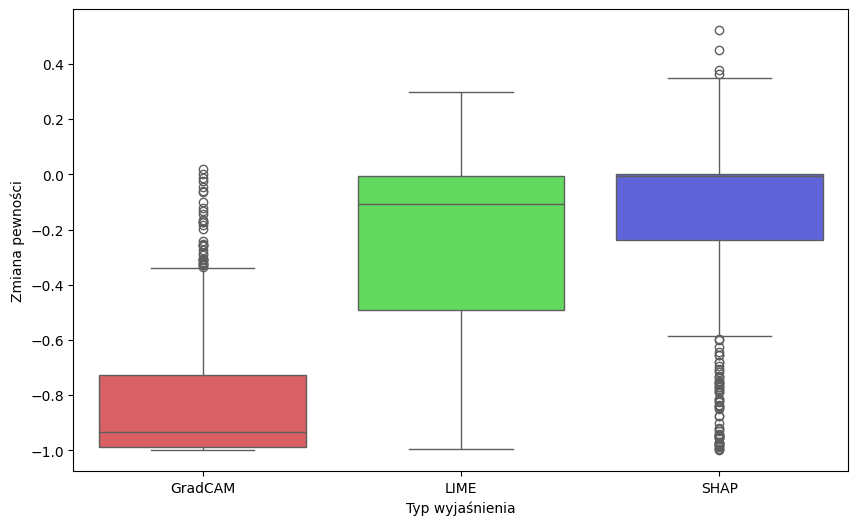

01_bird


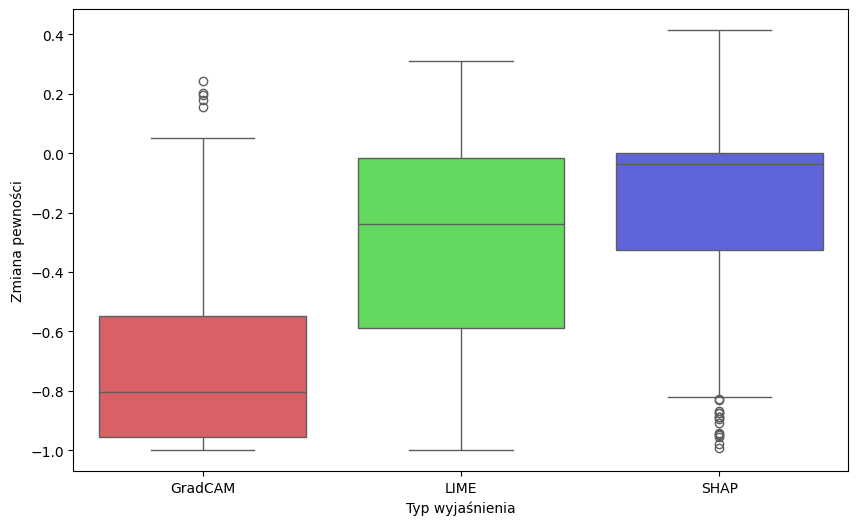

07_primate


In [334]:
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='exp_type', y='confidence_change_no_exp', data=merged[merged['Directory'] == category], palette=pal_base, hue='exp_type')
    plt.xlabel('Typ wyjaśnienia')
    plt.ylabel('Zmiana pewności')
    plt.show()
    print(category)

In [335]:
for category in categories:
    temp_df = merged[merged['Directory'] == category].copy()
    temp_df['__confidence_change_no_exp_drop'] = temp_df['confidence_change_no_exp'].apply(lambda x: 0 if x > 0 else x)
    average_iou = temp_df.groupby('exp_type')['__confidence_change_no_exp_drop'].mean().reset_index()
    print(category)
    print(average_iou)

04_carnivore
  exp_type  __confidence_change_no_exp_drop
0  GradCAM                        -0.709833
1     LIME                        -0.268193
2     SHAP                        -0.170374
08_fish
  exp_type  __confidence_change_no_exp_drop
0  GradCAM                        -0.786923
1     LIME                        -0.392582
2     SHAP                        -0.289812
00_dog
  exp_type  __confidence_change_no_exp_drop
0  GradCAM                        -0.712184
1     LIME                        -0.336678
2     SHAP                        -0.180713
05_insect
  exp_type  __confidence_change_no_exp_drop
0  GradCAM                        -0.802191
1     LIME                        -0.339857
2     SHAP                        -0.219888
03_reptile
  exp_type  __confidence_change_no_exp_drop
0  GradCAM                        -0.709709
1     LIME                        -0.365967
2     SHAP                        -0.218283
06_musical instrument
  exp_type  __confidence_change_no_exp_drop
0  Gr

# Size

In [336]:
sizes_df = pd.read_pickle("generated_data/sizes.pkl")
coherence_analysis_df = pd.read_pickle("generated_data/experiment.pkl")

In [337]:
coherence_analysis_df['img_name'] = coherence_analysis_df['img_name'].str.slice(stop=-5)
sizes_df['img_name'] = sizes_df['file_name'].str.slice(stop=-4)

In [338]:
merged = pd.merge(sizes_df, coherence_analysis_df, on='img_name', how='right')

In [339]:
def categorize_size(size):
    if size > 0.9:
        return 'XL'
    if size > 0.5:
        return 'L'
    elif size > 0.25:
        return 'M'
    elif size >0.02:
        return 'S'
    else:
        return 'XS'

merged['size_category'] = merged['size_percent'].apply(categorize_size)

In [340]:
category_order = ['XS','S', 'M', 'L', 'XL']

In [341]:
names_replace = {
    'gradcam': 'GradCAM',
    'shap': 'SHAP',
    'lime': 'LIME'
}
merged['exp_type'] = merged['exp_type'].replace(names_replace)

## IOU

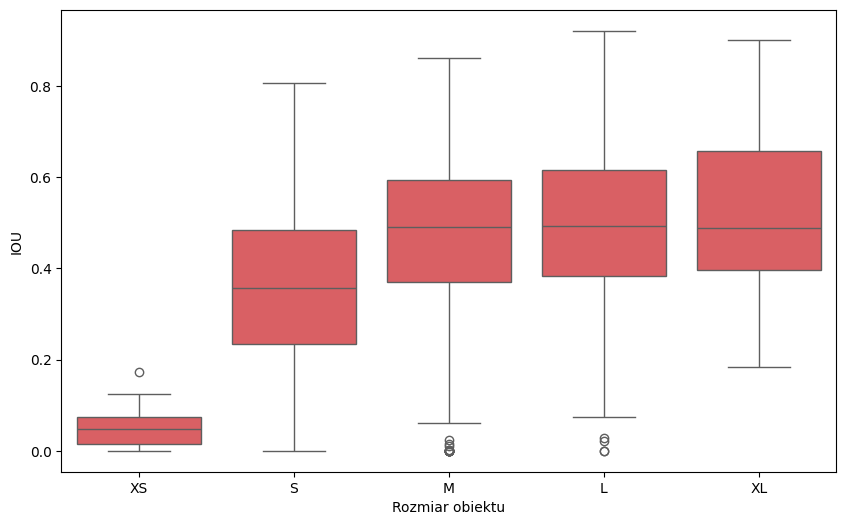

In [342]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='iou', data=merged[merged['exp_type']=='GradCAM'], order=category_order, color=pal_base['gradcam'])
plt.xlabel('Rozmiar obiektu')
plt.ylabel('IOU')
plt.show()

In [343]:
average_iou = merged[merged['exp_type']=='gradcam'].groupby('size_category')['iou'].mean().reset_index()
print(average_iou)

Empty DataFrame
Columns: [size_category, iou]
Index: []


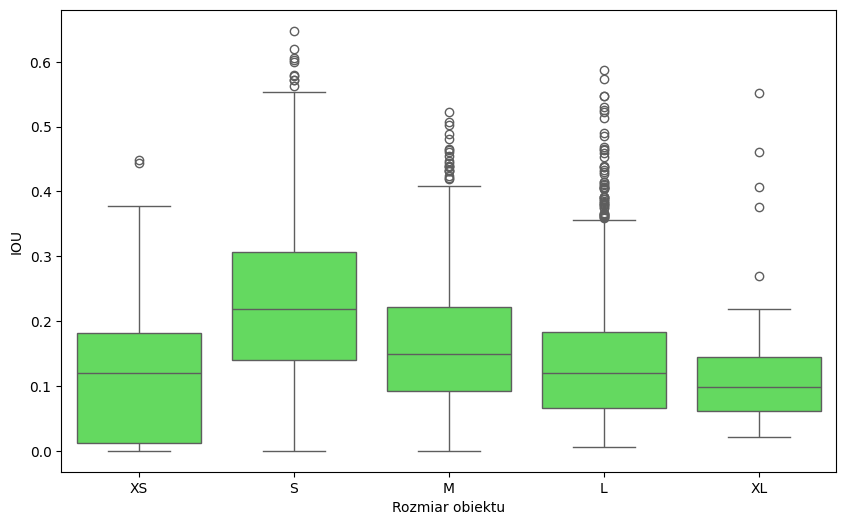

In [344]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='iou', data=merged[merged['exp_type']=='LIME'], order=category_order, color=pal_base['lime'])
plt.xlabel('Rozmiar obiektu')
plt.ylabel('IOU')
plt.show()

In [345]:
average_iou = merged[merged['exp_type']=='LIME'].groupby('size_category')['iou'].mean().reset_index()
print(average_iou)

  size_category       iou
0             L  0.139437
1             M  0.163982
2             S  0.227675
3            XL  0.131985
4            XS  0.126901


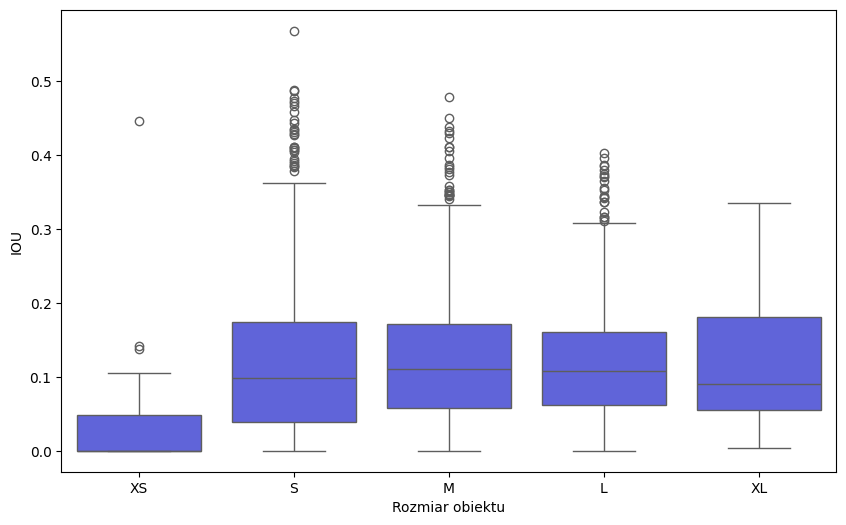

In [346]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='iou', data=merged[merged['exp_type']=='SHAP'], order=category_order, color=pal_base['shap'])
plt.xlabel('Rozmiar obiektu')
plt.ylabel('IOU')
plt.show()

In [347]:
average_iou = merged[merged['exp_type']=='SHAP'].groupby('size_category')['iou'].mean().reset_index()
print(average_iou)

  size_category       iou
0             L  0.118255
1             M  0.122531
2             S  0.117969
3            XL  0.118691
4            XS  0.035773


## area of explanation wrong percent

In [348]:
merged['incorrect%'] = merged['procent_incorrect'] * 100

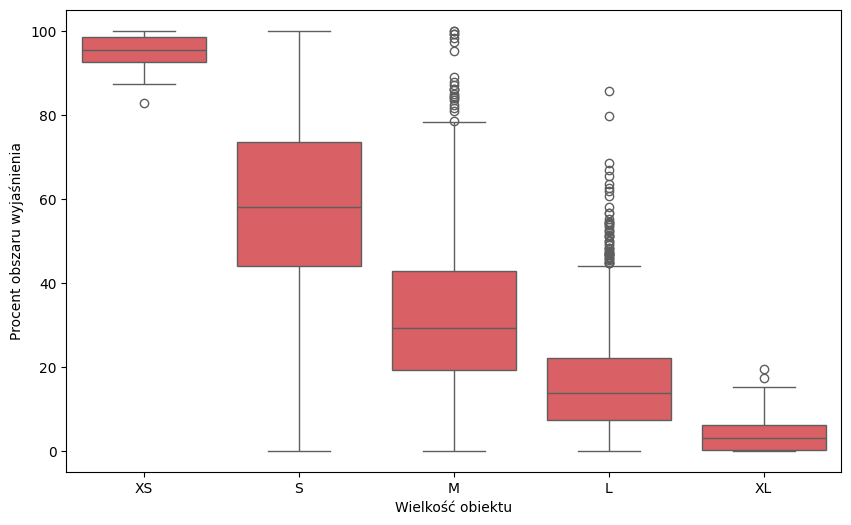

07_primate


In [349]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='incorrect%', data=merged[merged['exp_type'] == 'GradCAM'], palette=pal_base, hue='exp_type', order=category_order).legend_.remove()
plt.xlabel('Wielkość obiektu')
plt.ylabel('Procent obszaru wyjaśnienia')
plt.show()
print(category)

In [350]:
temp_df = merged[merged['exp_type'] == 'GradCAM'].copy()
average_iou = temp_df.groupby('size_category')['incorrect%'].mean().reset_index()
print(average_iou)

  size_category  incorrect%
0             L   16.371432
1             M   32.141339
2             S   58.767365
3            XL    4.259065
4            XS   94.901906


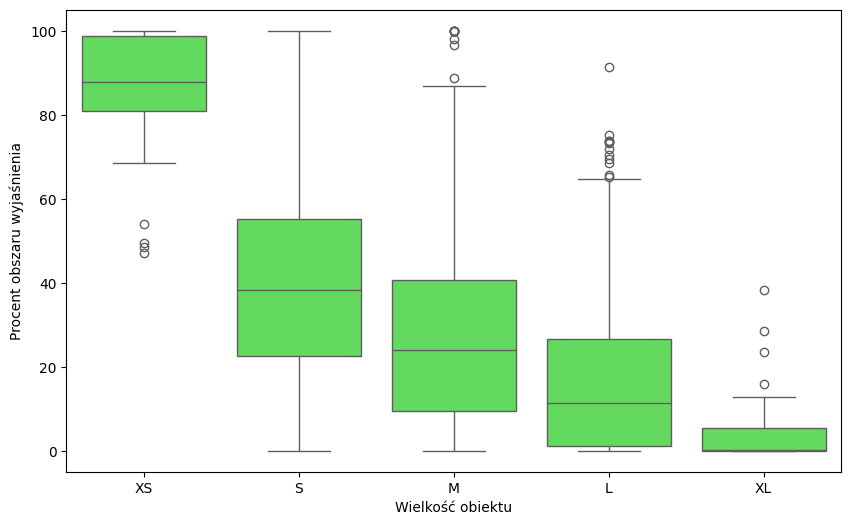

07_primate


In [351]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='incorrect%', data=merged[merged['exp_type'] == 'LIME'], palette=pal_base, hue='exp_type', order=category_order).legend_.remove()
plt.xlabel('Wielkość obiektu')
plt.ylabel('Procent obszaru wyjaśnienia')
plt.show()
print(category)

In [352]:
temp_df = merged[merged['exp_type'] == 'LIME'].copy()
average_iou = temp_df.groupby('size_category')['incorrect%'].mean().reset_index()
print(average_iou)

  size_category  incorrect%
0             L   16.118421
1             M   27.179856
2             S   40.634976
3            XL    4.566799
4            XS   85.985901


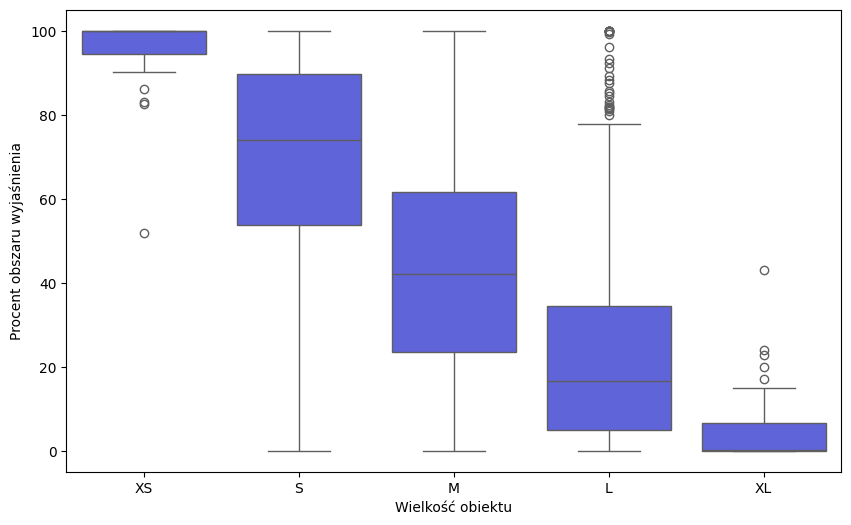

In [353]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='incorrect%', data=merged[merged['exp_type'] == 'SHAP'], palette=pal_base, hue='exp_type', order=category_order).legend_.remove()
plt.xlabel('Wielkość obiektu')
plt.ylabel('Procent obszaru wyjaśnienia')
plt.show()

In [354]:
temp_df = merged[merged['exp_type'] == 'SHAP'].copy()
average_iou = temp_df.groupby('size_category')['incorrect%'].mean().reset_index()
print(average_iou)

  size_category  incorrect%
0             L   22.106995
1             M   43.712921
2             S   69.416491
3            XL    4.921229
4            XS   95.942452


## exp

In [355]:
merged['confidence_change_exp'] = merged['new_pred'] - merged['old_pred']
merged['confidence_change_no_exp'] = merged['new_pred_wo_exp'] - merged['old_pred_wo_exp']

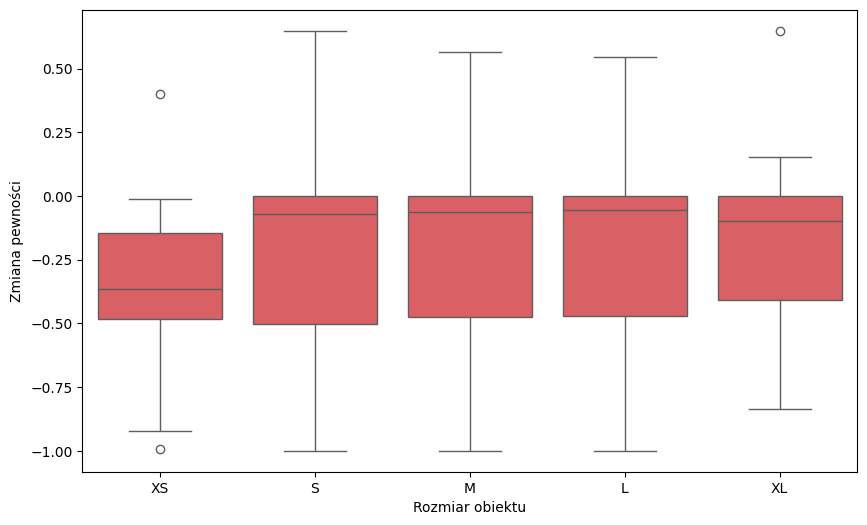

In [356]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='confidence_change_exp', data=merged[merged['exp_type']=='GradCAM'], order=category_order, color=pal_base['gradcam'])
plt.xlabel('Rozmiar obiektu')
plt.ylabel('Zmiana pewności')
plt.show()

In [357]:
temp_df = merged[merged['exp_type'] == 'GradCAM'].copy()
temp_df['__confidence_change_exp_drop'] = temp_df['confidence_change_exp'].apply(lambda x: 0 if x > 0 else x)
average_iou = temp_df.groupby('size_category')['__confidence_change_exp_drop'].mean().reset_index()
print(average_iou)

  size_category  __confidence_change_exp_drop
0             L                     -0.239186
1             M                     -0.242182
2             S                     -0.259113
3            XL                     -0.232523
4            XS                     -0.369749


In [358]:
temp_df = merged[merged['exp_type'] == 'GradCAM'].copy()
temp_df['__confidence_change_exp_rise'] = temp_df['confidence_change_exp'].apply(lambda x: 1 if x > 0 else 0)
average_iou = temp_df.groupby('size_category')['__confidence_change_exp_rise'].mean().reset_index()
print(average_iou)

  size_category  __confidence_change_exp_rise
0             L                      0.255947
1             M                      0.263048
2             S                      0.233896
3            XL                      0.191489
4            XS                      0.023256


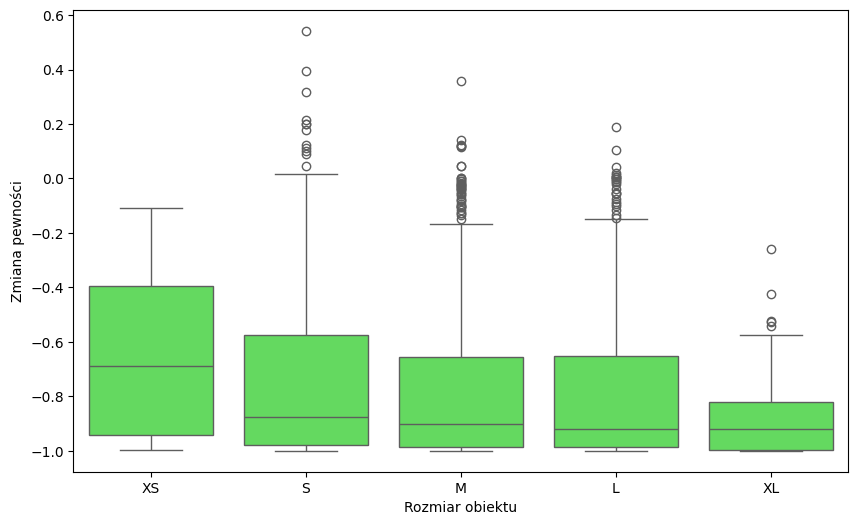

In [359]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='confidence_change_exp', data=merged[merged['exp_type']=='LIME'], order=category_order, color=pal_base['lime'])
plt.xlabel('Rozmiar obiektu')
plt.ylabel('Zmiana pewności')
plt.show()

In [360]:
temp_df = merged[merged['exp_type'] == 'LIME'].copy()
temp_df['__confidence_change_exp_drop'] = temp_df['confidence_change_exp'].apply(lambda x: 0 if x > 0 else x)
average_iou = temp_df.groupby('size_category')['__confidence_change_exp_drop'].mean().reset_index()
print(average_iou)

  size_category  __confidence_change_exp_drop
0             L                     -0.803234
1             M                     -0.791863
2             S                     -0.750735
3            XL                     -0.861181
4            XS                     -0.637539


In [361]:
temp_df = merged[merged['exp_type'] == 'LIME'].copy()
temp_df['__confidence_change_exp_rise'] = temp_df['confidence_change_exp'].apply(lambda x: 1 if x > 0 else 0)
average_iou = temp_df.groupby('size_category')['__confidence_change_exp_rise'].mean().reset_index()
print(average_iou)

  size_category  __confidence_change_exp_rise
0             L                      0.006563
1             M                      0.006263
2             S                      0.013804
3            XL                      0.000000
4            XS                      0.000000


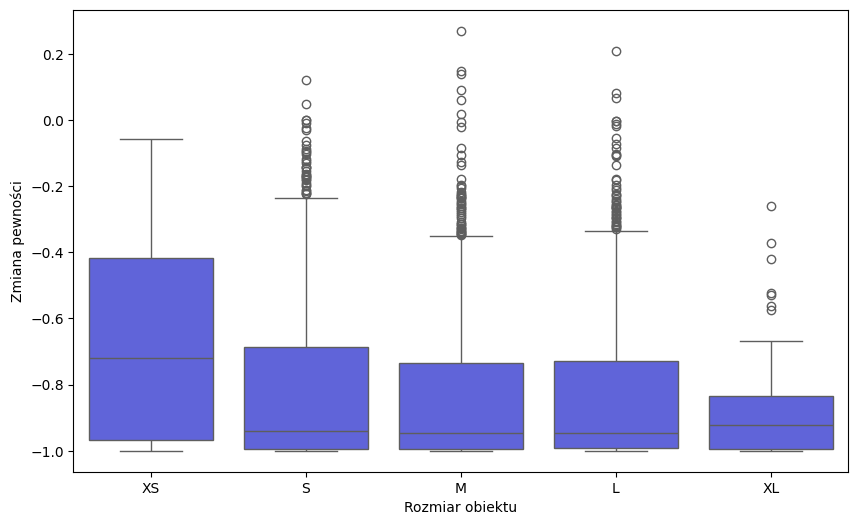

In [362]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='confidence_change_exp', data=merged[merged['exp_type']=='SHAP'], order=category_order, color=pal_base['shap'])
plt.xlabel('Rozmiar obiektu')
plt.ylabel('Zmiana pewności')
plt.show()

In [363]:
temp_df = merged[merged['exp_type'] == 'SHAP'].copy()
temp_df['__confidence_change_exp_drop'] = temp_df['confidence_change_exp'].apply(lambda x: 0 if x > 0 else x)
average_iou = temp_df.groupby('size_category')['__confidence_change_exp_drop'].mean().reset_index()
print(average_iou)

  size_category  __confidence_change_exp_drop
0             L                     -0.833250
1             M                     -0.838422
2             S                     -0.812674
3            XL                     -0.860782
4            XS                     -0.657654


In [364]:
temp_df = merged[merged['exp_type'] == 'SHAP'].copy()
temp_df['__confidence_change_exp_rise'] = temp_df['confidence_change_exp'].apply(lambda x: 1 if x > 0 else 0)
average_iou = temp_df.groupby('size_category')['__confidence_change_exp_rise'].mean().reset_index()
print(average_iou)

  size_category  __confidence_change_exp_rise
0             L                      0.002461
1             M                      0.004175
2             S                      0.002301
3            XL                      0.000000
4            XS                      0.000000


## no exp

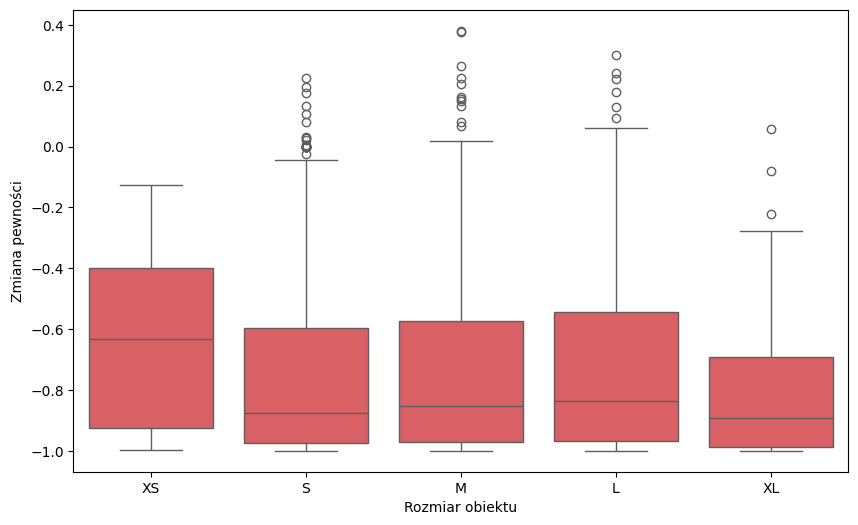

In [365]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='confidence_change_no_exp', data=merged[merged['exp_type']=='GradCAM'], order=category_order, color=pal_base['gradcam'])
plt.xlabel('Rozmiar obiektu')
plt.ylabel('Zmiana pewności')
plt.show()

In [366]:
temp_df = merged[merged['exp_type'] == 'GradCAM'].copy()
temp_df['__confidence_change_exp_rise'] = temp_df['confidence_change_no_exp'].apply(lambda x: 0 if x > 0 else x)
average_iou = temp_df.groupby('size_category')['__confidence_change_exp_rise'].mean().reset_index()
print(average_iou)

  size_category  __confidence_change_exp_rise
0             L                     -0.730637
1             M                     -0.749968
2             S                     -0.763479
3            XL                     -0.794106
4            XS                     -0.617362


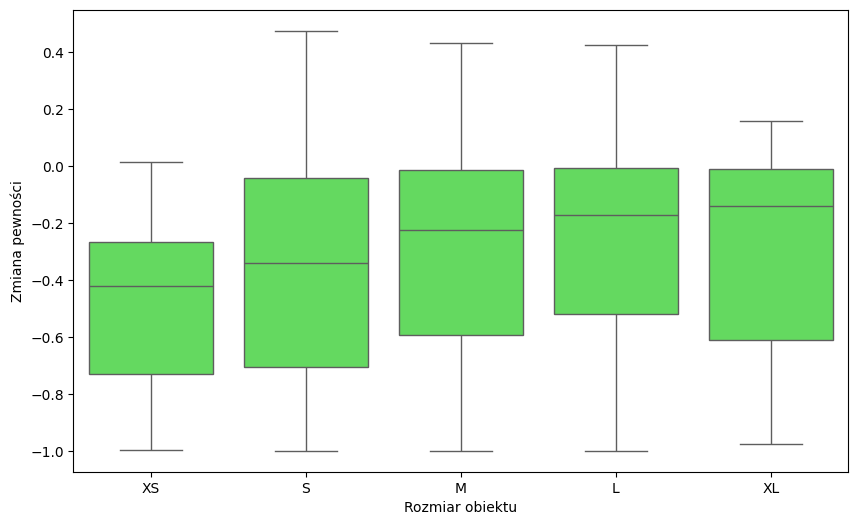

In [367]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='confidence_change_no_exp', data=merged[merged['exp_type']=='LIME'], order=category_order, color=pal_base['lime'])
plt.xlabel('Rozmiar obiektu')
plt.ylabel('Zmiana pewności')
plt.show()

In [368]:
temp_df = merged[merged['exp_type'] == 'LIME'].copy()
temp_df['__confidence_change_exp_rise'] = temp_df['confidence_change_no_exp'].apply(lambda x: 0 if x > 0 else x)
average_iou = temp_df.groupby('size_category')['__confidence_change_exp_rise'].mean().reset_index()
print(average_iou)

  size_category  __confidence_change_exp_rise
0             L                     -0.296358
1             M                     -0.326675
2             S                     -0.398575
3            XL                     -0.299977
4            XS                     -0.484938


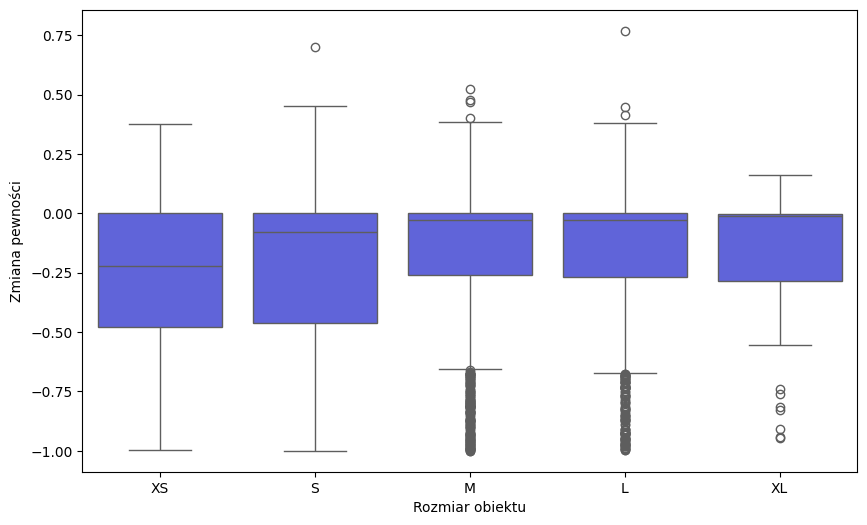

In [369]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='confidence_change_no_exp', data=merged[merged['exp_type']=='SHAP'], order=category_order, color=pal_base['shap'])
plt.xlabel('Rozmiar obiektu')
plt.ylabel('Zmiana pewności')
plt.show()

In [370]:
temp_df = merged[merged['exp_type'] == 'SHAP'].copy()
temp_df['__confidence_change_exp_rise'] = temp_df['confidence_change_no_exp'].apply(lambda x: 0 if x > 0 else x)
average_iou = temp_df.groupby('size_category')['__confidence_change_exp_rise'].mean().reset_index()
print(average_iou)

  size_category  __confidence_change_exp_rise
0             L                     -0.180975
1             M                     -0.177250
2             S                     -0.253015
3            XL                     -0.199899
4            XS                     -0.298606


# Combine

In [371]:
combined_df = pd.read_pickle("generated_data/combined.pkl")

In [372]:
names_replace = {
    'gradcamlime': 'GradCAM + LIME',
    'limeshap': 'LIME + SHAP',
    'gradcamshap': 'GradCAM + SHAP',
    'limegradcamshap': 'GradCAM + LIME + SHAP',
}
combined_df['exp_types'] = combined_df['exp_types'].replace(names_replace)

In [373]:
lime_color = '#51ed4c'
gradcam_color = '#ed4c51'
shap_color = '#4c51ed'

In [374]:
combined_df['confidence_change_exp_or'] = combined_df['new_pred_or'] - combined_df['old_pred_or']
combined_df['confidence_change_exp_and'] = combined_df['new_pred_and'] - combined_df['old_pred_and']

combined_df['confidence_change_no_exp_or'] = combined_df['new_pred_wo_exp_or'] - combined_df['old_pred_wo_exp_or']
combined_df['confidence_change_no_exp_and'] = combined_df['new_pred_wo_exp_and'] - combined_df['old_pred_wo_exp_and']

In [375]:
pal_base_combine = {
    'GradCAM + LIME': '#9f9d4f',
    'GradCAM + SHAP': '#9d4f9f',
    'LIME + SHAP': '#4f9f9d',
    'GradCAM + LIME + SHAP': '#838383',
    }

## IoU

### and

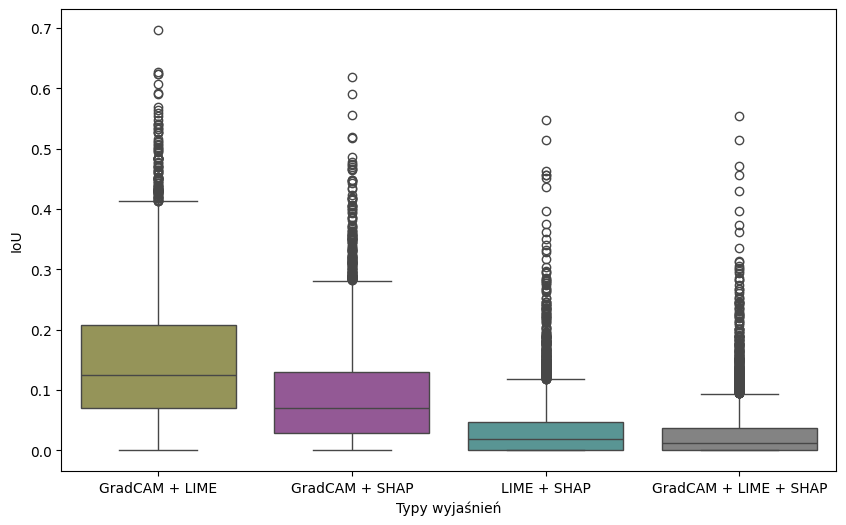

In [376]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_types', y='iou_and', data=combined_df, palette=pal_base_combine, hue='exp_types')
plt.xlabel('Typy wyjaśnień')
plt.ylabel('IoU')
plt.show()

In [377]:
average_iou = combined_df.groupby('exp_types')['iou_and'].mean().reset_index()
print(average_iou)

               exp_types   iou_and
0         GradCAM + LIME  0.150297
1  GradCAM + LIME + SHAP  0.029152
2         GradCAM + SHAP  0.091504
3            LIME + SHAP  0.035271


### or

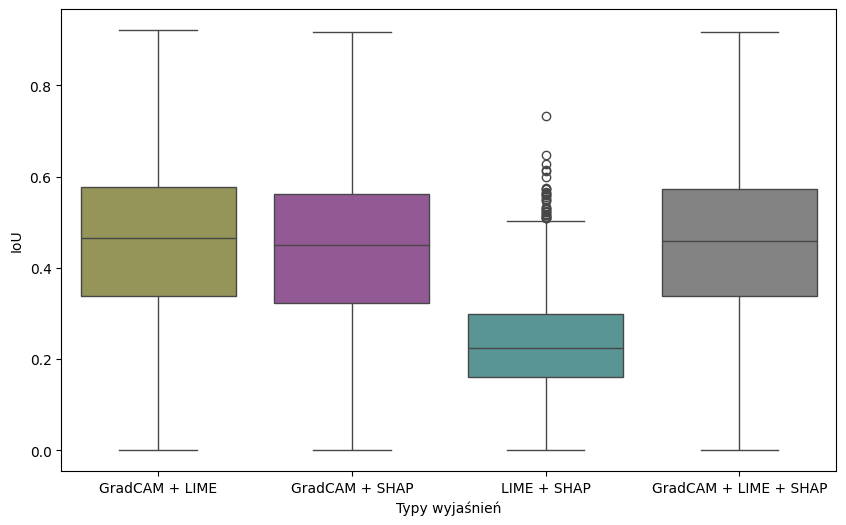

In [378]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_types', y='iou_or', data=combined_df, palette=pal_base_combine, hue='exp_types')
plt.xlabel('Typy wyjaśnień')
plt.ylabel('IoU')
plt.show()

In [379]:
average_iou = combined_df.groupby('exp_types')['iou_or'].mean().reset_index()
print(average_iou)

               exp_types    iou_or
0         GradCAM + LIME  0.452811
1  GradCAM + LIME + SHAP  0.448209
2         GradCAM + SHAP  0.438179
3            LIME + SHAP  0.233566


## Zmiana pewności mask

### and

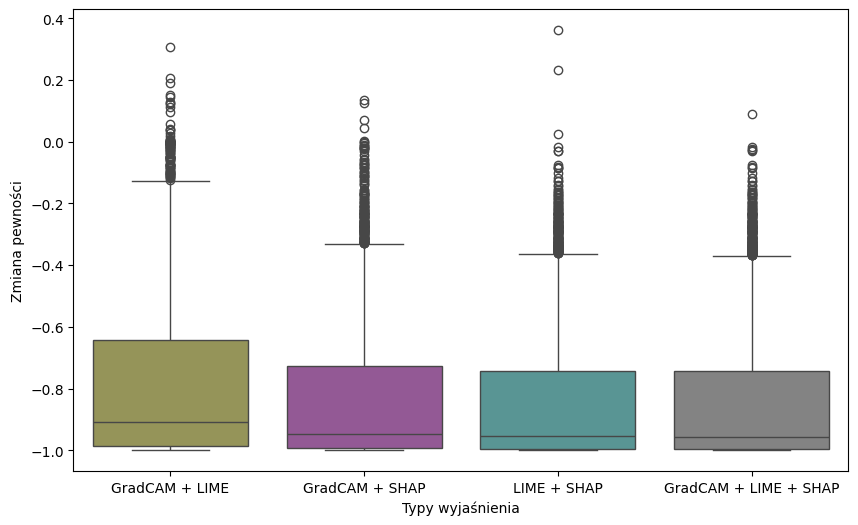

In [380]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_types', y='confidence_change_exp_and', data=combined_df, palette=pal_base_combine, hue='exp_types')
plt.xlabel('Typy wyjaśnienia')
plt.ylabel('Zmiana pewności')
plt.show()

In [381]:
average_iou = combined_df.groupby('exp_types')['confidence_change_exp_and'].mean().reset_index()
print(average_iou)

               exp_types  confidence_change_exp_and
0         GradCAM + LIME                  -0.789047
1  GradCAM + LIME + SHAP                  -0.841379
2         GradCAM + SHAP                  -0.832662
3            LIME + SHAP                  -0.840479


### or

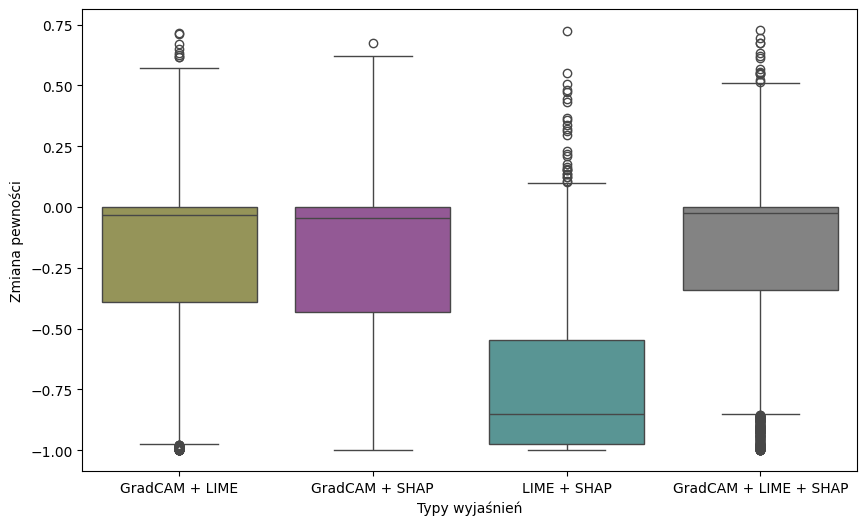

In [382]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_types', y='confidence_change_exp_or', data=combined_df, palette=pal_base_combine, hue='exp_types')
plt.xlabel('Typy wyjaśnień')
plt.ylabel('Zmiana pewności')
plt.show()

In [383]:
average_iou = combined_df.groupby('exp_types')['confidence_change_exp_or'].mean().reset_index()
print(average_iou)

               exp_types  confidence_change_exp_or
0         GradCAM + LIME                 -0.186505
1  GradCAM + LIME + SHAP                 -0.169937
2         GradCAM + SHAP                 -0.210394
3            LIME + SHAP                 -0.730767


## Zmiana pewności wo

### and

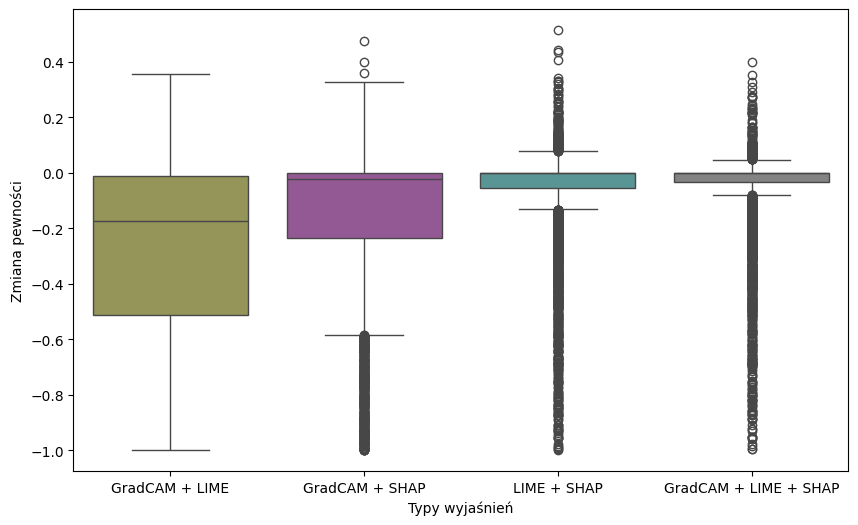

In [384]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_types', y='confidence_change_no_exp_and', data=combined_df, palette=pal_base_combine, hue='exp_types')
plt.xlabel('Typy wyjaśnień')
plt.ylabel('Zmiana pewności')
plt.show()

In [385]:
average_iou = combined_df.groupby('exp_types')['confidence_change_no_exp_and'].mean().reset_index()
print(average_iou)

               exp_types  confidence_change_no_exp_and
0         GradCAM + LIME                     -0.290897
1  GradCAM + LIME + SHAP                     -0.059519
2         GradCAM + SHAP                     -0.153363
3            LIME + SHAP                     -0.068956


### or

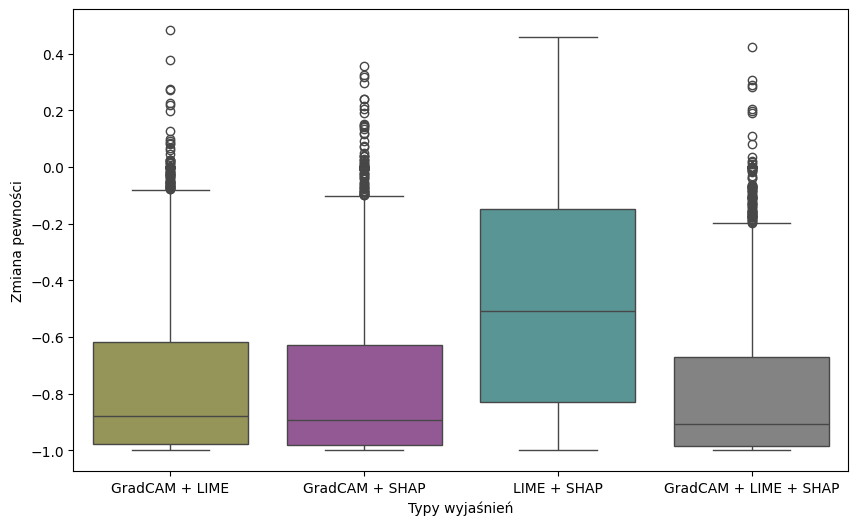

In [386]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_types', y='confidence_change_no_exp_or', data=combined_df, palette=pal_base_combine, hue='exp_types')
plt.xlabel('Typy wyjaśnień')
plt.ylabel('Zmiana pewności')
plt.show()

In [387]:
average_iou = combined_df.groupby('exp_types')['confidence_change_no_exp_or'].mean().reset_index()
print(average_iou)

               exp_types  confidence_change_no_exp_or
0         GradCAM + LIME                    -0.772289
1  GradCAM + LIME + SHAP                    -0.799201
2         GradCAM + SHAP                    -0.780159
3            LIME + SHAP                    -0.490221
